In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
authors = pd.read_csv("data/Authors.csv")
paper_authors = pd.read_csv("data/PaperAuthors.csv")
papers = pd.read_csv("data/Papers.csv")

**Sample view on each dataframes**

In [3]:
authors.head(5)

Id               Name
0  3967           Yi Zhang
1  3087  Aurelie C. Lozano
2  3039        Dustin Lang
3  6551        Xinghao Pan
4  8262    Theophane Weber

In [4]:
paper_authors.head(5)

Id  PaperId  AuthorId
0   1     5677      7956
1   2     5677      2649
2   3     5941      8299
3   4     5941      8300
4   5     5941       575

In [5]:
papers.describe()

Id
count   403.000000
mean   5834.000000
std     116.480327
min    5633.000000
25%    5733.500000
50%    5834.000000
75%    5934.500000
max    6035.000000

In [6]:
papers.head(5)

Id                                              Title  EventType  \
0  5677  Double or Nothing: Multiplicative Incentive Me...     Poster   
1  5941  Learning with Symmetric Label Noise: The Impor...  Spotlight   
2  6019   Algorithmic Stability and Uniform Generalization     Poster   
3  6035  Adaptive Low-Complexity Sequential Inference f...     Poster   
4  5978  Covariance-Controlled Adaptive Langevin Thermo...     Poster   

                                             PdfName  \
0  5677-double-or-nothing-multiplicative-incentiv...   
1  5941-learning-with-symmetric-label-noise-the-i...   
2  6019-algorithmic-stability-and-uniform-general...   
3  6035-adaptive-low-complexity-sequential-infere...   
4  5978-covariance-controlled-adaptive-langevin-t...   

                                            Abstract  \
0  Crowdsourcing has gained immense popularity in...   
1  Convex potential minimisation is the de facto ...   
2  One of the central questions in statistical le...   
3  We develop a sequential low-complexity inferen...   
4  Monte Carlo sampling for Bayesian posterior in...   

                                           PaperText  
0  Double or Nothing: Multiplicative\nIncentive M...  
1  Learning with Symmetric Label Noise: The\nImpo...  
2  Algorithmic Stability and Uniform Generalizati...  
3  Adaptive Low-Complexity Sequential Inference f...  
4  Covariance-Controlled Adaptive Langevin\nTherm...

**HIGH LEVEL APPROACH**
1. > Text PreProcessing
       a.Noise Removal
       b.Normalisation
2. > Data Exploration
       a.Word cloud to understand frequently used words
       b.Top 20 unigrams,bi-grams,tri-grams
3. > Convert text to a vector of word counts  
4. > Covert text to a vector of term frequencies
5. > Sort terms based on term frequencies in descending order to identify top N keywords

> Before preprocessing,it is advisable to explore dataset in terms of word count,most common and uncommon words 

In [7]:
papers.isnull().describe()

Id  Title EventType PdfName Abstract PaperText
count     403    403       403     403      403       403
unique      1      1         1       1        1         1
top     False  False     False   False    False     False
freq      403    403       403     403      403       403

> Dropping Event type column as it has no relevance at all.

In [8]:
papers.columns

Index(['Id', 'Title', 'EventType', 'PdfName', 'Abstract', 'PaperText'], dtype='object')

In [9]:
papers.drop(['EventType'],axis=1,inplace=True)
papers

Id                                              Title  \
0    5677  Double or Nothing: Multiplicative Incentive Me...   
1    5941  Learning with Symmetric Label Noise: The Impor...   
2    6019   Algorithmic Stability and Uniform Generalization   
3    6035  Adaptive Low-Complexity Sequential Inference f...   
4    5978  Covariance-Controlled Adaptive Langevin Thermo...   
..    ...                                                ...   
398  5792  Efficient Learning of Continuous-Time Hidden M...   
399  5674            Expectation Particle Belief Propagation   
400  5756  Latent Bayesian melding for integrating indivi...   
401  5745        Distributionally Robust Logistic Regression   
402  5666  Variational Dropout and the Local Reparameteri...   

                                               PdfName  \
0    5677-double-or-nothing-multiplicative-incentiv...   
1    5941-learning-with-symmetric-label-noise-the-i...   
2    6019-algorithmic-stability-and-uniform-general...   
3    6035-adaptive-low-complexity-sequential-infere...   
4    5978-covariance-controlled-adaptive-langevin-t...   
..                                                 ...   
398  5792-efficient-learning-of-continuous-time-hid...   
399   5674-expectation-particle-belief-propagation.pdf   
400  5756-latent-bayesian-melding-for-integrating-i...   
401  5745-distributionally-robust-logistic-regressi...   
402  5666-variational-dropout-and-the-local-reparam...   

                                              Abstract  \
0    Crowdsourcing has gained immense popularity in...   
1    Convex potential minimisation is the de facto ...   
2    One of the central questions in statistical le...   
3    We develop a sequential low-complexity inferen...   
4    Monte Carlo sampling for Bayesian posterior in...   
..                                                 ...   
398  The Continuous-Time Hidden Markov Model (CT-HM...   
399  We propose an original particle-based implemen...   
400  In many statistical problems, a more coarse-gr...   
401  This paper proposes a distributionally robust ...   
402  We explore an as yet unexploited opportunity f...   

                                             PaperText  
0    Double or Nothing: Multiplicative\nIncentive M...  
1    Learning with Symmetric Label Noise: The\nImpo...  
2    Algorithmic Stability and Uniform Generalizati...  
3    Adaptive Low-Complexity Sequential Inference f...  
4    Covariance-Controlled Adaptive Langevin\nTherm...  
..                                                 ...  
398  Efficient Learning of Continuous-Time Hidden\n...  
399  Expectation Particle Belief Propagation\n\nThi...  
400  Latent Bayesian melding for integrating indivi...  
401  Distributionally Robust Logistic Regression\n\...  
402  Variational Dropout and\nthe Local Reparameter...  

[403 rows x 5 columns]

> Words of each abstract are counted

In [10]:
papers['word_count']=papers['Abstract'].apply(lambda x:len(str(x).split(" ")))
papers[['Abstract','word_count']].head()

Abstract  word_count
0  Crowdsourcing has gained immense popularity in...         154
1  Convex potential minimisation is the de facto ...         146
2  One of the central questions in statistical le...         168
3  We develop a sequential low-complexity inferen...         122
4  Monte Carlo sampling for Bayesian posterior in...         117

In [11]:
papers.word_count.describe()

count    403.000000
mean     148.650124
std       42.919155
min       58.000000
25%      119.000000
50%      145.000000
75%      177.500000
max      296.000000
Name: word_count, dtype: float64

> It indicate that average count for each word is 149 words per abstract.Min words per abstract is 58 and maximum words are 296 words.The word count is important to give us an indication of the size of the dataset that we are handling as well as the variation in word counts across the rows

> **Frequently used words**

In [12]:
freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[:20]
freq

the      3086
of       2106
a        1602
and      1415
to       1342
in        931
is        815
for       769
that      765
We        589
on        567
we        514
with      455
as        392
an        376
are       370
this      361
which     314
by        314
our       291
dtype: int64

> **Uncommon Words**

In [13]:
non_freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[-20:]
non_freq

Empirically                 1
Therefore                   1
decreasing-step-size        1
$\|\hat{M}^{(k)}-M^{(k)}    1
stimuli.                    1
termsof                     1
GQM                         1
regarding                   1
objectives),                1
ODE,                        1
exogenous                   1
plus                        1
primal,                     1
readily                     1
1/epsilon.                  1
martingale-based            1
payoff,                     1
Max-product                 1
witha                       1
(dual)                      1
dtype: int64

> **Text Pre-Processing **
> Objectives
1. Text Clean Up
2. Shrinking the vocabulary to retain only relevant/important words
3. Reduce sparsity

> Noise Removal can be done by removing redundant text components like Punctuation,Tags,URLs
> Normalization can be done by Lemmatization which works based on the root of the world and Stemming that removes suffixes

In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "good"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: good
lemmatization: good


> The stemming and lemmatizaton of most of the nouns are same as that of words itself.


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

> Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

> There is a default list of stopwords in python nltk library. In addition, we might want to add context specific stopwords for which the “most common words” that we listed in the beginning will be helpful.

In [16]:
##Creating a list of stopwords and adding a custom list of stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)

{'above', 'again', 'at', 'you', 'needn', 'will', 'own', 'when', 're', 'all', 't', 'those', 'during', 'whom', "you'd", 'an', 'weren', 'ourselves', 'aren', 'don', 'these', 'yourselves', 'this', 'into', 'has', 'doing', 'because', 'once', 'my', 'itself', 'any', 'how', 'from', 'so', 'after', 'more', "needn't", 'to', 'am', "haven't", 'did', 'was', 'having', 'y', "you've", "it's", "shan't", 'not', 'his', 'a', 'that', 'the', 'each', 'who', 'both', 'it', 'hers', 'your', 'about', 'below', 'now', 'yourself', 'ours', 'other', 'no', 'mightn', 'and', 'their', 'they', 'there', 'ma', 'nor', 'do', 'couldn', 'down', 'between', "aren't", 'most', 'through', 'o', 'where', 'theirs', 'here', 'too', 'against', 'been', "doesn't", "that'll", 'few', 'in', 'can', "mightn't", 'up', 'shan', "hasn't", 'before', 'our', "wouldn't", 'are', 'over', 'wasn', 'were', 'its', 'myself', 'have', 'haven', 'hadn', 'himself', 'by', "should've", 'while', 'with', "shouldn't", 'until', 'won', "didn't", "she's", 'for', 'does', 'than'

In [17]:
##Creating a list of custom stopwords
new_words= ["using", "show", "result", "large", "also",
            "iv", "one", "two", "new", "previously", "shown"]
stop_words=stop_words.union(new_words)

**Preprocessing Text**

In [18]:
corpus=[]
for i in range(0, 403):
    #remove punctuations
    text=re.sub('^[a-zA-Z]',' ',papers.Abstract[i])
    #convert to lower case
    text=text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    #remove special characters and digits
    text=re.sub('(\\d|\\W)',' ',text)
    #Convert to list from string
    #Stemming
    ps=PorterStemmer()
    #Lemmatization
    lem=WordNetLemmatizer()
    temp=[lem.lemmatize(word) for word in text.split() if word not in stop_words]
    text=" ".join(temp)
    corpus.append(text)
    

**Data Visualisation**

In [19]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

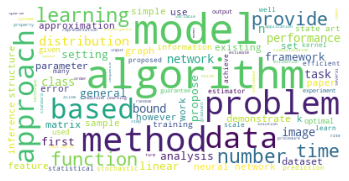

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color='white',stopwords=stop_words,
                                        max_words=100,
                                        max_font_size=50, 
                                        random_state=42 #near to std_dev
                                        ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

> Tokenisation is the process of converting the continuous text into a list of words. The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

**CountVectoriser to tokenise the text and build a vocabulary of known words.**
>     cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
    max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
    max_features — determines the number of columns in the matrix.
    n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(corpus)


[('neural network', 76), ('state art', 70), ('machine learning', 55), ('real world', 46), ('lower bound', 42), ('stochastic gradient', 38), ('low rank', 38), ('high dimensional', 36), ('learning algorithm', 34), ('monte carlo', 30), ('gradient descent', 28), ('convergence rate', 28), ('generative model', 24), ('latent variable', 23), ('learning problem', 23), ('variational inference', 22), ('paper present', 22), ('paper propose', 21), ('data set', 20), ('markov chain', 20)]


[Text(0, 0, 'neural network'),
 Text(1, 0, 'state art'),
 Text(2, 0, 'machine learning'),
 Text(3, 0, 'real world'),
 Text(4, 0, 'lower bound'),
 Text(5, 0, 'stochastic gradient'),
 Text(6, 0, 'low rank'),
 Text(7, 0, 'high dimensional'),
 Text(8, 0, 'learning algorithm'),
 Text(9, 0, 'monte carlo'),
 Text(10, 0, 'gradient descent'),
 Text(11, 0, 'convergence rate'),
 Text(12, 0, 'generative model'),
 Text(13, 0, 'latent variable'),
 Text(14, 0, 'learning problem'),
 Text(15, 0, 'variational inference'),
 Text(16, 0, 'paper present'),
 Text(17, 0, 'paper propose'),
 Text(18, 0, 'data set'),
 Text(19, 0, 'markov chain')]

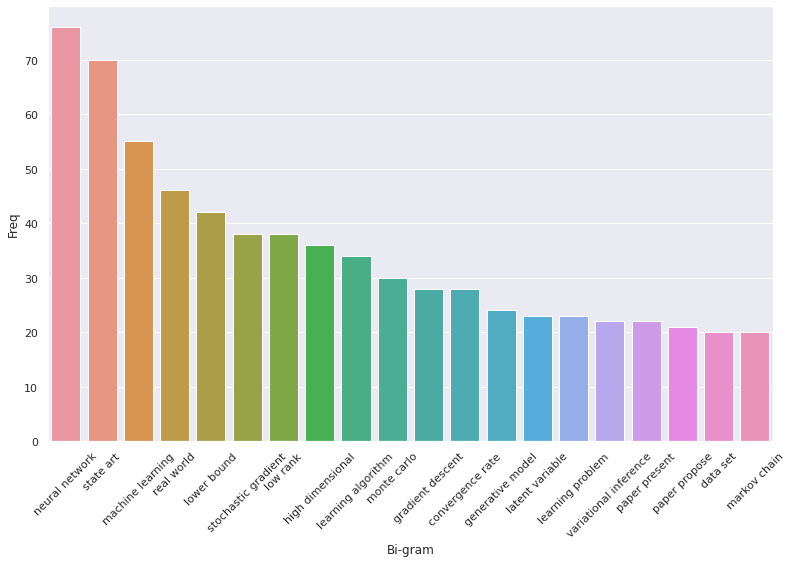

In [23]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_words)#Barplot of most freq Bi-grams

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                     Tri-gram  Freq
0              neural network    76
1                   state art    70
2            machine learning    55
3                  real world    46
4                 lower bound    42
5         stochastic gradient    38
6                    low rank    38
7            high dimensional    36
8          learning algorithm    34
9                 monte carlo    30
10           gradient descent    28
11           convergence rate    28
12           generative model    24
13            latent variable    23
14           learning problem    23
15      variational inference    22
16              paper present    22
17              paper propose    21
18                   data set    20
19               markov chain    20
20         objective function    20
21                upper bound    19
22       optimization problem    19
23          sample complexity    19
24       convolutional neural    18
25         proposed algorithm    18
26          matrix completio

[Text(0, 0, 'neural network'),
 Text(1, 0, 'state art'),
 Text(2, 0, 'machine learning'),
 Text(3, 0, 'real world'),
 Text(4, 0, 'lower bound'),
 Text(5, 0, 'stochastic gradient'),
 Text(6, 0, 'low rank'),
 Text(7, 0, 'high dimensional'),
 Text(8, 0, 'learning algorithm'),
 Text(9, 0, 'monte carlo'),
 Text(10, 0, 'gradient descent'),
 Text(11, 0, 'convergence rate'),
 Text(12, 0, 'generative model'),
 Text(13, 0, 'latent variable'),
 Text(14, 0, 'learning problem'),
 Text(15, 0, 'variational inference'),
 Text(16, 0, 'paper present'),
 Text(17, 0, 'paper propose'),
 Text(18, 0, 'data set'),
 Text(19, 0, 'markov chain'),
 Text(20, 0, 'objective function'),
 Text(21, 0, 'upper bound'),
 Text(22, 0, 'optimization problem'),
 Text(23, 0, 'sample complexity'),
 Text(24, 0, 'convolutional neural'),
 Text(25, 0, 'proposed algorithm'),
 Text(26, 0, 'matrix completion'),
 Text(27, 0, 'loss function'),
 Text(28, 0, 'synthetic real'),
 Text(29, 0, 'gaussian process'),
 Text(30, 0, 'well known'),


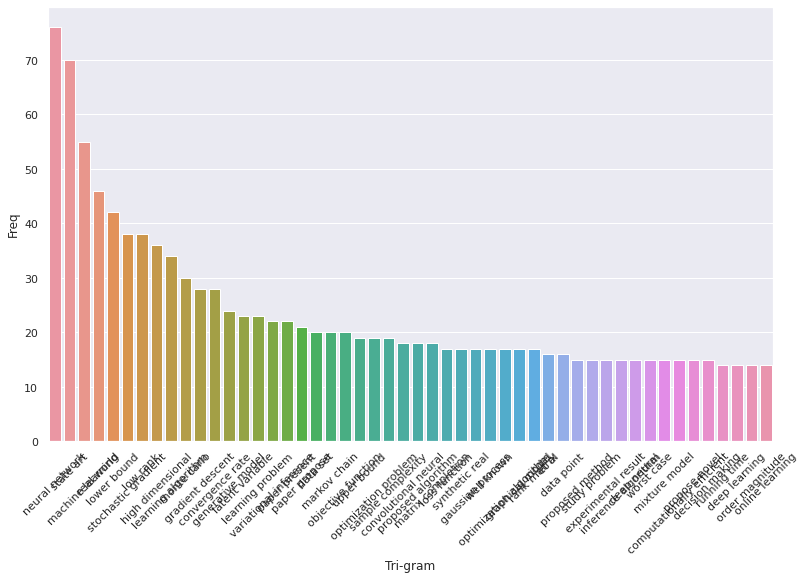

In [24]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=100)
top3_df = pd.DataFrame(top3_words[:50])
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

Converting to a matrix of integers

The next step of refining the word counts is using the TF-IDF vectoriser. The deficiency of a mere word count obtained from the countVectoriser is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. This is overcome by the TF-IDF vectoriser which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.

TF-IDF consists of 2 components:

    TF — term frequency
    IDF — Inverse document frequency
    TF=Freq of terms/total no of terms
    IDF=log(total documents)/number of documents with the term
    

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[123]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [26]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
n important class problem involves training deep neural network sparse prediction target high dimension occur naturally e g neural language model learning word embeddings often posed predicting probability next word among vocabulary size e g computing equally typically non sparse dimensional output vector last hidden layer reasonable dimension e g incurs prohibitive dd computational cost example updating time output weight matrix computing gradient needed backpropagation previous layer efficient handling sparse network input trivial case sparse target thus far sidestepped approximate alternative hierarchical softmax sampling based approximation training work develop original algorithmic approach family loss function includes squared error spherical softmax compute exact loss gradient update output weight gradient backpropagation per example instead dd remarkably without ever computing dimensional output proposed algorithm yield speedup frac e order magnitude typical size cri

Ideally for the IDF calculation to be effective, it should be based on a large corpora and a good representative of the text for which the keywords need to be extracted. In our example, if we use the full article text instead of the abstracts, the IDF extraction would be much more effective. However, considering the size of the dataset, I have limited the corpora to just the abstracts for the purpose of demonstration.

In [35]:
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation

print(list(punctuation))
nlp = spacy.load("en_core_web_md")


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [658]:
stop_words = set(stopwords.words('english'))

new_words = ["said", "inc", "year", "corp", "also", "net", "may", "com", "percent", "time", "new"]
stop_words = list(stop_words.union(new_words)) + list(punctuation)

new_stop_words = []
for stop_word in stop_words:
    new_stop_words.append(stop_word[0].upper() + stop_word[1:])

stop_words += new_stop_words

ps = PorterStemmer()
lem = WordNetLemmatizer()

import re


def pre_process(text, return_tokens=True):
    clean = []
    for sent in sent_tokenize(text, language="french"):

        sent = sent.replace('¬\n', '')
        sent = sent.replace('\n', ' ')
        sent = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",sent)
        sent = re.sub('(\\d|\\W)',' ',sent)
        sent = re.sub(' +', ' ', sent)
        
        #doc = nlp(text)
        #for ent in doc.ents:
        #   # print(ent.text, ent.start_char, ent.end_char, ent.label_)
        #    if ent.label_ in ['DATE', 'MONEY', 'WORK_OF_ART', 'CARDINAL', 'PERCENT']:
        #        text = text.replace(ent.text, ' ')
        sent = re.sub(r'http\S+', '', sent)

        while '--' in sent:
            sent = sent[sent.index('--')+2:]
        if '. Visit' in sent:
            sent = sent[:sent.index('. Visit')]
        if '. visit' in sent:
            sent = sent[:sent.index('. visit')]

        sent = sent.lower()
        words = word_tokenize(sent, language="french")
        temp_words = [word for word in words if word not in stop_words]
        temp_words = [word for word in temp_words if len(word) > 2]
        temp_words = [word for word in temp_words if not word.isupper()]
        temp_words = [word for word in temp_words if '$' not in word]
        temp_words = [word for word in temp_words if '@' not in word]
        temp_words = [word for word in temp_words if 'http' not in word]
        temp_words = [word for word in temp_words if 'www' not in word]
        temp_words = [lem.lemmatize(word) for word in temp_words if lem.lemmatize(word) not in stop_words]
        clean += temp_words
    
    if return_tokens: 
        return clean
    else:
        return ' '.join(clean)


[Text(0, 0, 'news'),
 Text(1, 0, 'company'),
 Text(2, 0, 'story'),
 Text(3, 0, 'microsoft'),
 Text(4, 0, 'bloomberg'),
 Text(5, 0, 'contact'),
 Text(6, 0, 'editor'),
 Text(7, 0, 'industry'),
 Text(8, 0, 'link'),
 Text(9, 0, 'see'),
 Text(10, 0, 'category'),
 Text(11, 0, 'service'),
 Text(12, 0, 'region'),
 Text(13, 0, 'responsible'),
 Text(14, 0, 'solution'),
 Text(15, 0, 'business'),
 Text(16, 0, 'cloud'),
 Text(17, 0, 'illustration'),
 Text(18, 0, 'technology'),
 Text(19, 0, 'reporter')]

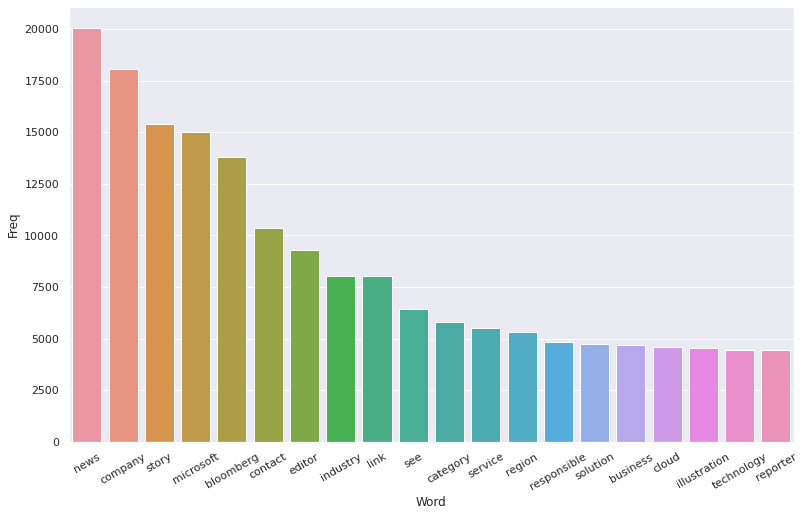

In [574]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot

top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words[:50])
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [492]:
#from pytrends.request import TrendReq
#pytrends = TrendReq(hl='en-US', tz=360)

In [682]:
import pickle as pkl

#with open('data/MSFT_1907_noPreprocessing', 'rb') as f:
with open('data/MSFT_Jul2019_2020', 'rb') as f:
    data = pkl.load(f)

In [427]:
data.head()

headline  \
0  Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1  Ascent Media Introduces AERO, a New Enterprise...   
2  PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3  Corent, Microsoft, Financial Inclusion Leader ...   
4  I Can't Believe It's Not Butter!(R), Interpoll...   

                                                text  \
0  Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1              Ascent Media Introduces AERO, a Ne...   
2  PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3  Corent, Microsoft, Financial Inclusion Leader ...   
4  Report Groundbreaking Results at Conclusion of...   

                                            dtickers  \
0  [{'Id': 'MSFT', 'score': '100'}, {'Id': '7974@...   
1  [{'Id': 'MSFT', 'score': '83'}, {'Id': '137866...   
2  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'DELL'...   
3  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'XYF',...   
4  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'UNA@N...   

                                             dtopics             time  \
0  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  09:36:00.297000   
1  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'MS...  08:45:27.795000   
2  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'ER...  12:33:00.343000   
3  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  10:00:00.411000   
4  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  01:11:52.613000   

         date  
0  2019-07-14  
1  2019-07-12  
2  2019-07-14  
3  2019-07-02  
4  2019-07-04

In [428]:
len(data)

11504

In [683]:
data = data.sort_values(by="date")

data

headline  \
404    Pentagon Cyber Warfare Strategy in ‘Final Stag...   
358    Cos. Have FOIA, Privacy Issues in Sharing Cybe...   
360    Howard Schmidt Says Cyber Infrastructure Must ...   
362    Howard Schmidt Says Cyber Infrastructure Must ...   
364    Supply Chain Needs Better Transparency, Simpli...   
...                                                  ...   
11318  DH2i to Address How to Mitigate Microsoft SQL ...   
11343  Microsoft licenses Crowe Lease Accounting Opti...   
11338  Catapult Systems Receives Multiple Awards at M...   
11332  Unscrambl integrates with Microsoft Teams to l...   
11339  Ribbon to Demonstrate Industry-leading Microso...   

                                                    text  \
404    By Tony Capaccio   May 31 (Bloomberg) -- The U...   
358    By Juliann Francis   April 19 (Bloomberg) -- C...   
360    By Juliann Francis and Eric Engleman   April 1...   
362    By Juliann Francis and Eric Engleman   April 1...   
364    By Juliann Francis   April 19 (Bloomberg) -- C...   
...                                                  ...   
11318    DH2i to Address How to Mitigate Microsoft SQ...   
11343    Microsoft licenses Crowe Lease Accounting Op...   
11338    Catapult Systems Receives Multiple Awards at...   
11332    Unscrambl integrates with Microsoft Teams to...   
11339    Ribbon to Demonstrate Industry-leading Micro...   

                                                dtickers  \
404    [{'Id': 'RTN', 'score': '95'}, {'Id': 'MSFT', ...   
358    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
360    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
362    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
364    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
...                                                  ...   
11318                   [{'Id': 'MSFT', 'score': '100'}]   
11343                   [{'Id': 'MSFT', 'score': '100'}]   
11338                   [{'Id': 'MSFT', 'score': '100'}]   
11332                   [{'Id': 'MSFT', 'score': '100'}]   
11339  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'RBBN'...   

                                                 dtopics             time  \
404    [{'Id': 'UNREST', 'score': '70'}, {'Id': 'USTO...  12:55:37.678000   
358    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:36.513000   
360    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
362    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
364    [{'Id': 'MTC', 'score': '70'}, {'Id': 'AL', 's...  08:17:34.317000   
...                                                  ...              ...   
11318  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:58:06.708000   
11343  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:11:50.828000   
11338  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  16:46:43.018000   
11332  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  13:00:05.480000   
11339  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  20:53:09.891000   

             date  
404    2019-07-01  
358    2019-07-01  
360    2019-07-01  
362    2019-07-01  
364    2019-07-01  
...           ...  
11318  2020-07-28  
11343  2020-07-29  
11338  2020-07-29  
11332  2020-07-29  
11339  2020-07-30  

[11504 rows x 6 columns]

In [430]:
data.head()

headline  \
404  Pentagon Cyber Warfare Strategy in ‘Final Stag...   
358  Cos. Have FOIA, Privacy Issues in Sharing Cybe...   
360  Howard Schmidt Says Cyber Infrastructure Must ...   
362  Howard Schmidt Says Cyber Infrastructure Must ...   
364  Supply Chain Needs Better Transparency, Simpli...   

                                                  text  \
404  By Tony Capaccio   May 31 (Bloomberg) -- The U...   
358  By Juliann Francis   April 19 (Bloomberg) -- C...   
360  By Juliann Francis and Eric Engleman   April 1...   
362  By Juliann Francis and Eric Engleman   April 1...   
364  By Juliann Francis   April 19 (Bloomberg) -- C...   

                                              dtickers  \
404  [{'Id': 'RTN', 'score': '95'}, {'Id': 'MSFT', ...   
358  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
360  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
362  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
364  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   

                                               dtopics             time  \
404  [{'Id': 'UNREST', 'score': '70'}, {'Id': 'USTO...  12:55:37.678000   
358  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:36.513000   
360  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
362  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
364  [{'Id': 'MTC', 'score': '70'}, {'Id': 'AL', 's...  08:17:34.317000   

           date  
404  2019-07-01  
358  2019-07-01  
360  2019-07-01  
362  2019-07-01  
364  2019-07-01

In [431]:
data.tail()

headline  \
11318  DH2i to Address How to Mitigate Microsoft SQL ...   
11343  Microsoft licenses Crowe Lease Accounting Opti...   
11338  Catapult Systems Receives Multiple Awards at M...   
11332  Unscrambl integrates with Microsoft Teams to l...   
11339  Ribbon to Demonstrate Industry-leading Microso...   

                                                    text  \
11318    DH2i to Address How to Mitigate Microsoft SQ...   
11343    Microsoft licenses Crowe Lease Accounting Op...   
11338    Catapult Systems Receives Multiple Awards at...   
11332    Unscrambl integrates with Microsoft Teams to...   
11339    Ribbon to Demonstrate Industry-leading Micro...   

                                                dtickers  \
11318                   [{'Id': 'MSFT', 'score': '100'}]   
11343                   [{'Id': 'MSFT', 'score': '100'}]   
11338                   [{'Id': 'MSFT', 'score': '100'}]   
11332                   [{'Id': 'MSFT', 'score': '100'}]   
11339  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'RBBN'...   

                                                 dtopics             time  \
11318  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:58:06.708000   
11343  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:11:50.828000   
11338  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  16:46:43.018000   
11332  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  13:00:05.480000   
11339  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  20:53:09.891000   

             date  
11318  2020-07-28  
11343  2020-07-29  
11338  2020-07-29  
11332  2020-07-29  
11339  2020-07-30

In [488]:
def remove_noise(text):
    while '--' in text:
        text = text[text.index('--')+2:]
    if '. Visit' in text:
        text = text[:text.index('. Visit')]
    if '. visit' in text:
        text = text[:text.index('. visit')]
    while '-0-' in text:
        text = text[:text.index('-0-')]
    while ' SOURCE ' in text:
        text = text[:text.index(' SOURCE ')]
    while 'NOTE:' in text:
        text = text[:text.index('NOTE:')]
    while 'More information can be found' in text:
        text = text[:text.index('More information can be found')]
    while 'CONTACT:' in text:
        text = text[:text.index('CONTACT:')]
    while 'For more information' in text:
        text = text[:text.index('For more information')]
    while 'NOTE TO EDITORS:' in text:
        text = text[:text.index('NOTE TO EDITORS:')]
    while 'can be found at' in text:
        text = text[:text.index('can be found at')]

    
    return text

In [684]:
print(data['text'][12])

DXC Technology Expands Strategic Partnership with Launch of a Microsoft Azure Digital Transformation PracticeDXC Technology Expands Strategic Partnership with Launch of a Microsoft Azure Digital Transformation PracticeBusiness WireTYSONS, Va. -- July 11, 2019DXC Technology (NYSE: DXC), the world’s leading independent, end-to-end IT services company, today announced the expansion of its strategic partnership with Microsoft through the formation of a global Microsoft Azure Digital Transformation Practice to accelerate client migration to the Microsoft Azure public cloud with greater efficiency and agility. Organizations are increasingly seeking ways to accelerate their migration to cloud and efficiently scale their digital strategies. “The worldwide public cloud services market is projected to grow 17.5 percent in 2019 to total $214.3 billion, up from $182.4 billion in 2018, according to Gartner, Inc.”* “Organizations need cloud-related services to get onboarded onto public clouds and to

In [489]:

print(remove_noise(data['text'][12]))

 July 11, 2019DXC Technology (NYSE: DXC), the world’s leading independent, end-to-end IT services company, today announced the expansion of its strategic partnership with Microsoft through the formation of a global Microsoft Azure Digital Transformation Practice to accelerate client migration to the Microsoft Azure public cloud with greater efficiency and agility. Organizations are increasingly seeking ways to accelerate their migration to cloud and efficiently scale their digital strategies. “The worldwide public cloud services market is projected to grow 17.5 percent in 2019 to total $214.3 billion, up from $182.4 billion in 2018, according to Gartner, Inc.”* “Organizations need cloud-related services to get onboarded onto public clouds and to transform their operations as they adopt public cloud services,” said Sid Nag, research vice president at Gartner. “Currently almost 19 percent of cloud budgets are spent on cloud-related services, such as cloud consulting, implementation, migr

In [348]:
data['text1'] = data['text'].apply(lambda x: post_process(str(x)))

In [349]:
data

headline  \
0      Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1      Ascent Media Introduces AERO, a New Enterprise...   
2      PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3      Corent, Microsoft, Financial Inclusion Leader ...   
4      I Can't Believe It's Not Butter!(R), Interpoll...   
...                                                  ...   
11499  U.S. Companies Finding EU Allies in Fighting T...   
11500  U.S. Equity Movers Final: Dow Jones, E-Cruiter...   
11501  Microsoft Makes Investment in ABN Amro Bond Fu...   
11502  Microsoft Invests 740 Mln Guilders in ABN Amro...   
11503  Amadeus Raises $310 Million for Venture Capita...   

                                                    text  \
0      Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1                  Ascent Media Introduces AERO, a Ne...   
2      PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3      Corent, Microsoft, Financial Inclusion Leader ...   
4      Report Groundbreaking Results at Conclusion of...   
...                                                  ...   
11499  U.S. Companies Finding EU Allies in Fighting T...   
11500  U.S. Equity Movers Final: Dow Jones, E-Cruiter...   
11501  Microsoft Makes Investment in ABN Amro Bond Fu...   
11502  Microsoft Invests 740 Mln Guilders in ABN Amro...   
11503  By Edward Evans   March 12 (Bloomberg) -- Amad...   

                                                dtickers  \
0      [{'Id': 'MSFT', 'score': '100'}, {'Id': '7974@...   
1      [{'Id': 'MSFT', 'score': '83'}, {'Id': '137866...   
2      [{'Id': 'MSFT', 'score': '100'}, {'Id': 'DELL'...   
3      [{'Id': 'MSFT', 'score': '100'}, {'Id': 'XYF',...   
4      [{'Id': 'MSFT', 'score': '100'}, {'Id': 'UNA@N...   
...                                                  ...   
11499  [{'Id': 'SAN@FP', 'score': '96'}, {'Id': 'MSFT...   
11500  [{'Id': 'BCOR', 'score': '70'}, {'Id': 'MGM', ...   
11501  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'AOG@N...   
11502  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'FXBY'...   
11503  [{'Id': 'QCOM', 'score': '50'}, {'Id': 'PE1840...   

                                                 dtopics             time  \
0      [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  09:36:00.297000   
1      [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'MS...  08:45:27.795000   
2      [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'ER...  12:33:00.343000   
3      [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  10:00:00.411000   
4      [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  01:11:52.613000   
...                                                  ...              ...   
11499  [{'Id': 'TAX', 'score': '100'}, {'Id': 'TEL', ...  19:02:02.593000   
11500  [{'Id': 'USPN', 'score': '91'}, {'Id': 'DISTRI...  21:43:57.133000   
11501  [{'Id': 'EUB', 'score': '99'}, {'Id': 'BIZNEWS...  21:50:22.398000   
11502  [{'Id': 'EUB', 'score': '99'}, {'Id': 'BIZNEWS...  21:50:27.796000   
11503  [{'Id': 'CORPFIN', 'score': '100'}, {'Id': 'TE...  23:57:51.529000   

             date                                              text1  
0      2019-07-14  July 14, 2019 Xbox, Playstation & Nintendo Pri...  
1      2019-07-12  April 13, 2010      Ascent    Media Group, LLC...  
2      2019-07-14  July 14, 2019 The team of Prime Day sales expe...  
3      2019-07-02  July 2, 2019Corent Technology, a technology le...  
4      2019-07-04  BUSINESS WIRE)--September 22, 2008 Interpolls,...  
...           ...                                                ...  
11499  2020-07-23  U.S. companies such as Microsoft Corp. and Eas...  
11500  2020-07-23  The following is a list of companies whose sha...  
11501  2020-07-23  Microsoft Corp. said it paid 740 million guild...  
11502  2020-07-23  ABN Amro Holding NV said Microsoft Corp. inves...  
11503  2020-07-23  Amadeus Capital Partners Ltd., the British ven...  

[11504 rows x 7 columns]

In [493]:
#corpus = [pre_process(remove_noise(text), return_tokens=True) for text in data['text'].tolist()]

In [589]:
corpus = [pre_process(text, return_tokens=True) for text in data['text'].tolist()]

In [590]:
len(corpus)

11504

In [591]:
corpus = [x for x in corpus if len(x) > 2]

In [592]:
len(corpus)

11504

In [593]:
from itertools import chain
temp = list(chain(*corpus))

len(temp)

4171347

In [594]:
freq = pd.Series(temp).value_counts()[:20]
freq

company       63819
microsoft     54010
share         33124
news          29662
bloomberg     25910
yahoo         25864
million       21324
cent          21262
software      20114
stock         19734
service       19335
rose          18580
story         18084
internet      17784
market        17035
business      16439
analyst       16234
google        15626
technology    15547
quarter       15418
dtype: int64

In [595]:
freq = pd.Series(temp).value_counts()[-120:]
freq

olaf             1
inordinate       1
mxap             1
ormstm           1
truefx           1
                ..
foliofn          1
wireamsterdam    1
ttt              1
_znga            1
fusehere         1
Length: 120, dtype: int64

In [596]:
fd = nltk.FreqDist(temp) 
print(fd.most_common(130))

[('company', 63819), ('microsoft', 54010), ('share', 33124), ('news', 29662), ('bloomberg', 25910), ('yahoo', 25864), ('million', 21324), ('cent', 21262), ('software', 20114), ('stock', 19734), ('service', 19335), ('rose', 18580), ('story', 18084), ('internet', 17784), ('market', 17035), ('business', 16439), ('analyst', 16234), ('google', 15626), ('technology', 15547), ('quarter', 15418), ('based', 14847), ('search', 14436), ('sale', 14200), ('fell', 13782), ('contact', 13582), ('first', 13287), ('maker', 13103), ('industry', 13099), ('billion', 12770), ('product', 11622), ('link', 11086), ('system', 10673), ('editor', 10508), ('york', 10446), ('information', 10395), ('site', 9983), ('web', 9895), ('computer', 9635), ('data', 9581), ('network', 9488), ('customer', 9442), ('window', 9391), ('world', 9248), ('online', 9247), ('see', 9047), ('user', 8962), ('security', 8615), ('revenue', 8562), ('price', 8550), ('group', 8281), ('today', 8224), ('solution', 8087), ('one', 8020), ('range',

In [597]:
'team' in temp

True

In [598]:
corpus = [text for text in corpus if len(text) > 1]

In [508]:
len(corpus)

6994

In [659]:
corpus = [pre_process(text, return_tokens=False) for text in data['text'].tolist()]
dates = [date for date in data['date'].tolist()]

In [667]:
data['text'].tolist()[5]

'By Juliann Francis   April 19 (Bloomberg) -- Clarity in vendor contracts and streamlined technology would lead to more security in supply chain, say panelists at Bloomberg Cybersecurity Conference in New York.  * Vendors need to be “transparent when there’s an incident,”   says Marene Allison, VP and Chief Information Security   Officer at Johnson & Johnson  * Cos. need to have policies to prevent vulnerability in data,   such as keeping some info offline, Allison says  * Robert Carey, principal deputy DOD CIO, says supply chain   protection would be improved by simplifying, streamlining   network environment  * AT&T SVP, Chief Security Officer Edward Amoroso says cos.   need to be “nimble” with supply chain, look at things   bought with skepticism, not trust Link to Company News:{AAPL US CN } Link to Company News:{BAC US CN } Link to Company News:{BAH US CN } Link to Company News:{C US CN } Link to Company News:{CNP US CN } Link to Company News:{COF US CN } Link to Company News:{DTE 

In [666]:
corpus[5]

'juliann francis april bloomberg clarity vendor contract streamlined technology would lead security supply chain say panelist bloomberg cybersecurity conference york vendor need transparent incident say marene allison chief information security officer johnson johnson co need policy prevent vulnerability data keeping info offline allison say robert carey principal deputy dod cio say supply chain protection would improved simplifying streamlining network environment svp chief security officer edward amoroso say co need nimble supply chain look thing bought skepticism trust link company news aapl link company news bac link company news bah link company news link company news cnp link company news cof link company news dte link company news link company news link company news goog link company news hr link company news ibm link company news intc link company news jnj link company news jpm link company news lmt link company news msft link company news link company news noc link company new

In [600]:
dates[1]

datetime.date(2019, 7, 1)

In [601]:
data['text'].tolist()[0]

'By Tony Capaccio   May 31 (Bloomberg) -- The U.S. Defense Department is in the ‘final stages’ of drafting a military strategy for cyber warfare, based on a White House decision that equates such attacks with armed assaults.   Marine Corps Colonel David Lapan told reporters at the Pentagon that the new policy will be completed in two or three weeks.   The White House on May 17 announced that cyber attacks ranked with military threats against the nation. Link to Company News:{EMC US CN } Link to Company News:{GD US CN } Link to Company News:{GOOG US CN } Link to Company News:{HRS US CN } Link to Company News:{LLL US CN } Link to Company News:{LMT US CN } Link to Company News:{MSFT US CN } Link to Company News:{NOC US CN } Link to Company News:{RTN US CN } Link to Company News:{BA US CN } For Related News and Information: Top Stories:{TOP} To contact the reporter on this story: Tony Capaccio in Washington at +1-202-624-1911 or acapaccio@bloomberg.net To contact the editor responsible for

In [602]:
corpus[0]

'tony capaccio bloomberg defense department final stage drafting military strategy cyber warfare based white house decision equates attack armed assault marine colonel david lapan told reporter pentagon policy completed two three week white house announced cyber attack ranked military threat nation link company news emc link company news link company news goog link company news hr link company news lll link company news lmt link company news msft link company news noc link company news rtn link company news related news information top story top contact reporter story tony capaccio washington acapaccio bloomberg contact editor responsible story steven komarow skomarow bloomberg'

In [603]:
corpus[1]

'juliann francis april bloomberg co unsure whether cyber threat information share govt guarded strategic use foia competitor concern say megan brown partner wiley rein bloomberg cybersecurity conference lack uncertainty quite inhibiting co could sharing threat data govt brown say privacy law inhibiting information sharing say marcus sachs govt affair verizon current privacy law outdated prevent co verizon telling one govt agency another agency internal cyber threat link company news aapl link company news bac link company news bah link company news link company news cnp link company news cof link company news dte link company news link company news link company news goog link company news hr link company news ibm link company news intc link company news jpm link company news lmt link company news msft link company news link company news noc link company news link company news pnc link company news pom link company news link company news link company news sai link company news sre link 

In [604]:
i = 0
for text in data['text'].tolist():
    if 'coronav' in text:
        i+=1
print(i)

127


In [685]:
top_words = get_top_n_words(corpus, n=150)#% + get_top_n2_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["N-grams", "Freq"]
print(top_df)#Barplot of most freq Bi-grams



       N-grams   Freq
0      company  63819
1    microsoft  54010
2        share  33124
3         news  29662
4    bloomberg  25910
..         ...    ...
145      video   3948
146  available   3884
147       name   3883
148       work   3845
149       game   3843

[150 rows x 2 columns]


In [669]:
for _, row in top_df.iterrows():
    print(row['N-grams'])

company
microsoft
share
news
bloomberg
yahoo
million
cent
software
stock
service
rose
story
internet
market
business
analyst
google
technology
quarter
based
search
sale
fell
contact
first
maker
industry
billion
product
link
system
editor
york
information
site
web
computer
data
network
customer
window
world
online
see
user
security
revenue
price
group
today
solution
one
range
earnings
estimate
last
buy
financial
largest
would
month
expects
profit
top
management
second
loss
statement
investor
msft
according
high
including
report
category
cloud
executive
index
related
offer
average
trading
region
chief
medium
third
partner
washington
california
responsible
people
result
eps
research
two
make
help
phone
nasdaq
reporter
court
communication
call
plan
use
cost
say
advertising
biggest
application
seagate
growth
yesterday
san
expected
provider
day
illustration
week
global
consumer
much
forecast
president
sell
value
azure
officer
investment
mobile
earlier
device
patent
international
equity
acces

In [518]:
len(top_df)

50

In [686]:
KEYWORD_LIST = top_df['N-grams'].tolist()

print(KEYWORD_LIST)

['company', 'microsoft', 'share', 'news', 'bloomberg', 'yahoo', 'million', 'cent', 'software', 'stock', 'service', 'rose', 'story', 'internet', 'market', 'business', 'analyst', 'google', 'technology', 'quarter', 'based', 'search', 'sale', 'fell', 'contact', 'first', 'maker', 'industry', 'billion', 'product', 'link', 'system', 'editor', 'york', 'information', 'site', 'web', 'computer', 'data', 'network', 'customer', 'window', 'world', 'online', 'see', 'user', 'security', 'revenue', 'price', 'group', 'today', 'solution', 'one', 'range', 'earnings', 'estimate', 'last', 'buy', 'financial', 'largest', 'would', 'month', 'expects', 'profit', 'top', 'management', 'second', 'loss', 'statement', 'investor', 'msft', 'according', 'high', 'including', 'report', 'category', 'cloud', 'executive', 'index', 'related', 'offer', 'average', 'trading', 'region', 'chief', 'medium', 'third', 'partner', 'washington', 'california', 'responsible', 'people', 'result', 'eps', 'research', 'two', 'make', 'help', 'p

In [687]:
KEYWORD_LIST = ['microsoft', 'azure', 'cloud', 'security', 'million', 'team', 'platform', 'solution', 'business', 'cloud']

In [560]:
#!python -m spacy download en_core_web_md

In [688]:
def get_similarity_matrix(KEYWORD_LIST, kw_list):
    
    similarity_matrix = []
    common_kw_list = nlp(','.join(KEYWORD_LIST))
    new_kw_list = nlp(','.join(kw_list))

    for keyword1 in common_kw_list:
        if keyword1.text not in [',']:
            similarity_vector = []
            for keyword2 in common_kw_list:
                if keyword2.text not in [',']:
                    
                    if keyword1.text == keyword2.text:
                        similarity = 1.0
                        similarity_vector.append(similarity)
                    else:
                        found = False
                        for lookout_keyword in new_kw_list:
                            if lookout_keyword.text == keyword2.text:
                                similarity = lookout_keyword.similarity(keyword1)
                                found = True
                        if found == False:
                            similarity_vector.append(0.0)
                        else:
                            similarity_vector.append(similarity)
                            
            similarity_matrix.append(similarity_vector)
            
        #import pdb;pdb.set_trace()
        
    #for keyword1 in kw_list:
    #    similarity_vector = []
    #    for keyword2 in kw_list:
    #        if keyword1 == keyword2:
    #            similarity = 1.0
    #        else:
    #            similarity = nlp(keyword1).similarity(nlp(keyword2))
    #        similarity_vector.append(similarity)
    #    similarity_matrix.append(similarity_vector)
    return np.array(similarity_matrix)

In [691]:
get_similarity_matrix(KEYWORD_LIST, KEYWORD_LIST).shape

(10, 10)

In [674]:
len(KEYWORD_LIST)

10

In [692]:
import numpy as np

matrix_similarity = get_similarity_matrix(KEYWORD_LIST, KEYWORD_LIST)

matrix_similarity.shape

(10, 10)

In [565]:
matrix_similarity

array([[1.        , 0.18359223, 0.36668488, 0.3696582 , 0.12892836,
        0.12663975, 0.27800426, 0.28034717, 0.31246942, 0.36668488],
       [0.18359223, 1.        , 0.22502342, 0.10312464, 0.0820618 ,
        0.04184914, 0.10114084, 0.07328334, 0.03336777, 0.22502342],
       [0.36668488, 0.22502342, 1.        , 0.36945316, 0.14962466,
        0.20005284, 0.44985694, 0.43507051, 0.36491531, 1.        ],
       [0.3696582 , 0.10312464, 0.36945316, 1.        , 0.20320106,
        0.25037318, 0.34505996, 0.41771001, 0.41188544, 0.36945316],
       [0.12892836, 0.0820618 , 0.14962466, 0.20320106, 1.        ,
        0.2178821 , 0.21839015, 0.15926503, 0.28221369, 0.14962466],
       [0.12663975, 0.04184914, 0.20005284, 0.25037318, 0.2178821 ,
        1.        , 0.25564271, 0.22529733, 0.39503577, 0.20005284],
       [0.27800426, 0.10114084, 0.44985694, 0.34505996, 0.21839015,
        0.25564271, 1.        , 0.46559033, 0.3668974 , 0.44985694],
       [0.28034717, 0.07328334, 0.4350705

In [694]:
sorted_vector = np.flip(np.sort(np.concatenate(matrix_similarity, axis=0)))

sorted_vector

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.46559033, 0.46559033, 0.44985694,
       0.44985694, 0.44985694, 0.44985694, 0.43507051, 0.43507051,
       0.43507051, 0.43507051, 0.41995332, 0.41995332, 0.41771001,
       0.41771001, 0.41188544, 0.41188544, 0.39503577, 0.39503577,
       0.3696582 , 0.3696582 , 0.36945316, 0.36945316, 0.36945316,
       0.36945316, 0.3668974 , 0.3668974 , 0.36668488, 0.36668488,
       0.36668488, 0.36668488, 0.36491531, 0.36491531, 0.36491531,
       0.36491531, 0.34505996, 0.34505996, 0.31246942, 0.31246942,
       0.28221369, 0.28221369, 0.28034717, 0.28034717, 0.27800426,
       0.27800426, 0.25564271, 0.25564271, 0.25037318, 0.25037318,
       0.22529733, 0.22529733, 0.22502342, 0.22502342, 0.22502342,
       0.22502342, 0.21839015, 0.21839015, 0.2178821 , 0.2178821 ,
       0.20320106, 0.20320106, 0.20005284, 0.20005284, 0.20005

In [695]:
sorted_matrix = np.reshape(sorted_vector, (matrix_similarity.shape[0], matrix_similarity.shape[1]))

sorted_matrix

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.46559033, 0.46559033, 0.44985694,
        0.44985694, 0.44985694, 0.44985694, 0.43507051, 0.43507051],
       [0.43507051, 0.43507051, 0.41995332, 0.41995332, 0.41771001,
        0.41771001, 0.41188544, 0.41188544, 0.39503577, 0.39503577],
       [0.3696582 , 0.3696582 , 0.36945316, 0.36945316, 0.36945316,
        0.36945316, 0.3668974 , 0.3668974 , 0.36668488, 0.36668488],
       [0.36668488, 0.36668488, 0.36491531, 0.36491531, 0.36491531,
        0.36491531, 0.34505996, 0.34505996, 0.31246942, 0.31246942],
       [0.28221369, 0.28221369, 0.28034717, 0.28034717, 0.27800426,
        0.27800426, 0.25564271, 0.25564271, 0.25037318, 0.25037318],
       [0.22529733, 0.22529733, 0.22502342, 0.22502342, 0.22502342,
        0.22502342, 0.21839015, 0.21839015, 0.2178821 , 0.2178821 ],
       [0.20320106, 0.20320106, 0.2000528

In [568]:
#ranking = np.sort(sorted_matrix, axis=1)
#
#ranking

In [696]:
def get_ranked_matrix(matrix_similarity, sorted_matrix):

    rank = 1
    ranked_matrix = np.zeros(shape=(matrix_similarity.shape[0], matrix_similarity.shape[0]))

    for i in range(matrix_similarity.shape[0]):
        for j in range(i, matrix_similarity.shape[0]):
            temp = sorted_matrix[i][j]
            for k in range(matrix_similarity.shape[0]):
                for p in range(k, matrix_similarity.shape[0]):
                    if (matrix_similarity[k][p] != 1.0) and (temp != 1.0):
                        if matrix_similarity[k][p] == temp:
                            ranked_matrix[k][p] = rank + 1

                            rank += 1
                            continue
    return ranked_matrix

In [697]:
ranked_matrix = get_ranked_matrix(matrix_similarity, sorted_matrix)

ranked_matrix

array([[ 0., 53., 34.,  0.,  0.,  0., 44.,  0., 43., 35.],
       [ 0.,  0.,  0., 57.,  0.,  0.,  0.,  0., 58.,  0.],
       [ 0.,  0.,  0., 28.,  0.,  0., 10., 14., 38.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 48., 41., 19., 21., 29.],
       [ 0.,  0.,  0.,  0.,  0., 52., 50., 55.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 46.,  0., 23.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 31., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17., 15.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 39.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [699]:
KEYWORD_LIST

['microsoft',
 'azure',
 'cloud',
 'security',
 'million',
 'team',
 'platform',
 'solution',
 'business',
 'cloud']

In [701]:
positions = np.zeros((ranked_matrix.shape[0], ranked_matrix.shape[1]))

for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
    if idx > 0:
        for i in range(matrix_similarity.shape[0]):
            for j in range(i, matrix_similarity.shape[0]):
                if idx == ranked_matrix[i][j]:
                    print(idx, keyword, i, j)
                    positions[i][j] = idx
                    
positions

3 cloud 6 7
10 cloud 2 6


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [572]:
KEYWORD_LIST

['microsoft',
 'azure',
 'cloud',
 'security',
 'million',
 'team',
 'platform',
 'solution',
 'business',
 'cloud']

In [631]:
from tqdm import tqdm
rankings = []

count = 0
#for index, row in data.iterrows():
for index, text in tqdm(enumerate(corpus), total=len(corpus)):
    try:
        #top_words = get_top_n_words([pre_process(row.Abstract)], n=20)# + \
        #top_words = get_top_n_words([pre_process(row.text, return_tokens=False)], n=20)# + \
        top_words = get_top_n_words([text], n=20)# + \
                                       # get_top_n2_words([pre_process(row.Abstract)], n=20)
        top_df = pd.DataFrame(top_words)

        top_df.columns=["N-grams", "Freq"]
        kw_list = top_df['N-grams'].tolist()
        #print(index, '='*10)

        matrix_similarity = get_similarity_matrix(KEYWORD_LIST, kw_list)

        sorted_vector = np.flip(np.sort(np.concatenate(matrix_similarity, axis=0)))
        sorted_matrix = np.reshape(sorted_vector, (matrix_similarity.shape[0], matrix_similarity.shape[1]))

        ranked_matrix = get_ranked_matrix(matrix_similarity, sorted_matrix)

        positions = np.zeros((ranked_matrix.shape[0], ranked_matrix.shape[1]))
        rank = 1
        for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
            if idx > 0:
                for i in range(matrix_similarity.shape[0]):
                    for j in range(i, matrix_similarity.shape[0]):

                        if idx == ranked_matrix[i][j]:
                            #print(idx, keyword, i, j)#, 'rank=', rank)
                            rank += 1
                            positions[i][j] = idx

        #print(np.concatenate(positions, axis=0))

        keyword_rankings = []
        for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
            rank_list = list(np.concatenate(positions, axis=0))
            if idx+1 in rank_list:
                index_position = rank_list.index(idx+1)
                #print(keyword, '-- rank=', index_position)
                keyword_rankings.append((keyword, index_position))

        rankings.append(keyword_rankings)
        count += 1
    except:
        print(text)
        print('empty vocabulary; perhaps the documents only contain stop words') 
    #if count > 80:
    #    break

100%|██████████| 11504/11504 [03:59<00:00, 48.12it/s]


'juliann francis april bloomberg co unsure whether cyber threat information share govt guarded strategic use foia competitor concern say megan brown partner wiley rein bloomberg cybersecurity conference lack uncertainty quite inhibiting co could sharing threat data govt brown say privacy law inhibiting information sharing say marcus sachs govt affair verizon current privacy law outdated prevent co verizon telling one govt agency another agency internal cyber threat link company news aapl link company news bac link company news bah link company news link company news cnp link company news cof link company news dte link company news link company news link company news goog link company news hr link company news ibm link company news intc link company news jpm link company news lmt link company news msft link company news link company news noc link company news link company news pnc link company news pom link company news link company news link company news sai link company news sre link 

In [670]:
rankings

[[],
 [],
 [],
 [],
 [('microsoft', 3), ('cloud', 23)],
 [('microsoft', 3), ('cloud', 23)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('microsoft', 3), ('cloud', 23)],
 [],
 [],
 [],
 [],
 [],
 [('microsoft', 78),
  ('azure', 38),
  ('cloud', 58),
  ('security', 68),
  ('team', 28),
  ('platform', 8),
  ('solution', 48)],
 [('microsoft', 78),
  ('cloud', 38),
  ('security', 58),
  ('team', 3),
  ('platform', 23),
  ('business', 28)],
 [],
 [('azure', 67),
  ('security', 26),
  ('team', 27),
  ('solution', 78),
  ('business', 58)],
 [('azure', 67),
  ('security', 26),
  ('team', 27),
  ('platform', 37),
  ('solution', 36)],
 [],
 [('microsoft', 67),
  ('cloud', 27),
  ('million', 78),
  ('platform', 37),
  ('solution', 38)],
 [('microsoft', 67),
  ('cloud', 27),
  ('million', 37),
  ('team', 3),
  ('platform', 23),
  ('business', 7)],
 [('microsoft', 34), ('cloud', 24), ('security', 4)],
 [('azure', 26),
  ('cloud', 36),
  ('security', 6),
  ('million', 56),
  ('team', 46)],
 [('pl

In [681]:
pairs = []
pair_dates = []
diffs = []
articles = []
for index, rank in enumerate(rankings[:-1]):
    print('='*10)
    for keyword1 in rankings[index]:
        for keyword2 in rankings[index+1]:
            print(keyword1, '--', keyword2)
            
            if keyword1[0] != keyword2[0]:
                #import pdb;pdb.set_trace()
                diff = keyword2[1] - keyword1[1]
                print(keyword1[0], keyword2[0], diff)
                #if diff > 0 and diff < 90:
                pairs.append(' '.join([keyword1[0], keyword2[0]]))
                diffs.append(diff)
                articles.append(index)
                pair_dates.append(dates[index])

('microsoft', 3) -- ('microsoft', 3)
('microsoft', 3) -- ('cloud', 23)
microsoft cloud 20
('cloud', 23) -- ('microsoft', 3)
cloud microsoft -20
('cloud', 23) -- ('cloud', 23)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('cloud', 38)
microsoft cloud -40
('microsoft', 78) -- ('security', 58)
microsoft security -20
('microsoft', 78) -- ('team', 3)
microsoft team -75
('microsoft', 78) -- ('platform', 23)
microsoft platform -55
('microsoft', 78) -- ('business', 28)
microsoft business -50
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('cloud', 38)
azure cloud 0
('azure', 38) -- ('security', 58)
azure security 20
('azure', 38) -- ('team', 3)
azure team -35
('azure', 38) -- ('platform', 23)
azure platform -15
('azure', 38) -- ('business', 28)
azure business -10
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('cloud', 38)
('cloud', 58) -- ('security', 58)
cloud security 0
('cloud', 58) -- ('team', 3)
cloud team -55
('cloud', 58) -

cloud microsoft -2
('cloud', 69) -- ('cloud', 27)
('cloud', 69) -- ('million', 78)
cloud million 9
('cloud', 69) -- ('team', 37)
cloud team -32
('cloud', 69) -- ('platform', 38)
cloud platform -31
('cloud', 69) -- ('solution', 58)
cloud solution -11
('cloud', 69) -- ('business', 68)
cloud business -1
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 69)
microsoft cloud 2
('cloud', 27) -- ('microsoft', 67)
cloud microsoft 40
('cloud', 27) -- ('cloud', 69)
('million', 78) -- ('microsoft', 67)
million microsoft -11
('million', 78) -- ('cloud', 69)
million cloud -9
('team', 37) -- ('microsoft', 67)
team microsoft 30
('team', 37) -- ('cloud', 69)
team cloud 32
('platform', 38) -- ('microsoft', 67)
platform microsoft 29
('platform', 38) -- ('cloud', 69)
platform cloud 31
('solution', 58) -- ('microsoft', 67)
solution microsoft 9
('solution', 58) -- ('cloud', 69)
solution cloud 11
('business', 68) -- ('microsoft', 67)
business microsoft -1
('business', 68) -- ('cloud', 69)

solution security 1
('solution', 78) -- ('million', 78)
solution million 0
('solution', 78) -- ('platform', 38)
solution platform -40
('solution', 78) -- ('solution', 3)
('business', 58) -- ('azure', 69)
business azure 11
('business', 58) -- ('security', 79)
business security 21
('business', 58) -- ('million', 78)
business million 20
('business', 58) -- ('platform', 38)
business platform -20
('business', 58) -- ('solution', 3)
business solution -55
('azure', 3) -- ('azure', 69)
('azure', 3) -- ('security', 79)
azure security 76
('azure', 3) -- ('team', 39)
azure team 36
('azure', 3) -- ('business', 2)
azure business -1
('security', 23) -- ('azure', 69)
security azure 46
('security', 23) -- ('security', 79)
('security', 23) -- ('team', 39)
security team 16
('security', 23) -- ('business', 2)
security business -21
('million', 13) -- ('azure', 69)
million azure 56
('million', 13) -- ('security', 79)
million security 66
('million', 13) -- ('team', 39)
million team 26
('million', 13) -- ('b

team platform 9
('team', 37) -- ('solution', 16)
team solution -21
('platform', 38) -- ('azure', 26)
platform azure -12
('platform', 38) -- ('cloud', 36)
platform cloud -2
('platform', 38) -- ('million', 6)
platform million -32
('platform', 38) -- ('team', 56)
platform team 18
('platform', 38) -- ('platform', 46)
('platform', 38) -- ('solution', 16)
platform solution -22
('solution', 58) -- ('azure', 26)
solution azure -32
('solution', 58) -- ('cloud', 36)
solution cloud -22
('solution', 58) -- ('million', 6)
solution million -52
('solution', 58) -- ('team', 56)
solution team -2
('solution', 58) -- ('platform', 46)
solution platform -12
('solution', 58) -- ('solution', 16)
('azure', 26) -- ('azure', 67)
('azure', 26) -- ('business', 26)
azure business 0
('cloud', 36) -- ('azure', 67)
cloud azure 31
('cloud', 36) -- ('business', 26)
cloud business -10
('million', 6) -- ('azure', 67)
million azure 61
('million', 6) -- ('business', 26)
million business 20
('team', 56) -- ('azure', 67)
tea

solution business -30
('microsoft', 67) -- ('azure', 67)
microsoft azure 0
('microsoft', 67) -- ('security', 26)
microsoft security -41
('microsoft', 67) -- ('team', 27)
microsoft team -40
('microsoft', 67) -- ('solution', 78)
microsoft solution 11
('microsoft', 67) -- ('business', 58)
microsoft business -9
('cloud', 27) -- ('azure', 67)
cloud azure 40
('cloud', 27) -- ('security', 26)
cloud security -1
('cloud', 27) -- ('team', 27)
cloud team 0
('cloud', 27) -- ('solution', 78)
cloud solution 51
('cloud', 27) -- ('business', 58)
cloud business 31
('million', 78) -- ('azure', 67)
million azure -11
('million', 78) -- ('security', 26)
million security -52
('million', 78) -- ('team', 27)
million team -51
('million', 78) -- ('solution', 78)
million solution 0
('million', 78) -- ('business', 58)
million business -20
('team', 37) -- ('azure', 67)
team azure 30
('team', 37) -- ('security', 26)
team security -11
('team', 37) -- ('team', 27)
('team', 37) -- ('solution', 78)
team solution 41
('t

('cloud', 36) -- ('solution', 48)
cloud solution 12
('cloud', 36) -- ('business', 35)
cloud business -1
('million', 6) -- ('microsoft', 78)
million microsoft 72
('million', 6) -- ('azure', 38)
million azure 32
('million', 6) -- ('security', 58)
million security 52
('million', 6) -- ('million', 68)
('million', 6) -- ('platform', 8)
million platform 2
('million', 6) -- ('solution', 48)
million solution 42
('million', 6) -- ('business', 35)
million business 29
('team', 56) -- ('microsoft', 78)
team microsoft 22
('team', 56) -- ('azure', 38)
team azure -18
('team', 56) -- ('security', 58)
team security 2
('team', 56) -- ('million', 68)
team million 12
('team', 56) -- ('platform', 8)
team platform -48
('team', 56) -- ('solution', 48)
team solution -8
('team', 56) -- ('business', 35)
team business -21
('platform', 46) -- ('microsoft', 78)
platform microsoft 32
('platform', 46) -- ('azure', 38)
platform azure -8
('platform', 46) -- ('security', 58)
platform security 12
('platform', 46) -- ('m

('solution', 68) -- ('cloud', 27)
solution cloud -41
('solution', 68) -- ('million', 78)
solution million 10
('solution', 68) -- ('team', 37)
solution team -31
('solution', 68) -- ('platform', 38)
solution platform -30
('solution', 68) -- ('solution', 58)
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 27)
microsoft cloud -40
('microsoft', 67) -- ('million', 78)
microsoft million 11
('microsoft', 67) -- ('team', 37)
microsoft team -30
('microsoft', 67) -- ('platform', 38)
microsoft platform -29
('microsoft', 67) -- ('solution', 58)
microsoft solution -9
('cloud', 27) -- ('microsoft', 67)
cloud microsoft 40
('cloud', 27) -- ('cloud', 27)
('cloud', 27) -- ('million', 78)
cloud million 51
('cloud', 27) -- ('team', 37)
cloud team 10
('cloud', 27) -- ('platform', 38)
cloud platform 11
('cloud', 27) -- ('solution', 58)
cloud solution 31
('million', 78) -- ('microsoft', 67)
million microsoft -11
('million', 78) -- ('cloud', 27)
million cloud -51
('million', 78) -- ('mill

security team 19
('security', 37) -- ('platform', 46)
security platform 9
('security', 37) -- ('solution', 16)
security solution -21
('million', 7) -- ('azure', 26)
million azure 19
('million', 7) -- ('cloud', 36)
million cloud 29
('million', 7) -- ('million', 6)
('million', 7) -- ('team', 56)
million team 49
('million', 7) -- ('platform', 46)
million platform 39
('million', 7) -- ('solution', 16)
million solution 9
('team', 57) -- ('azure', 26)
team azure -31
('team', 57) -- ('cloud', 36)
team cloud -21
('team', 57) -- ('million', 6)
team million -51
('team', 57) -- ('team', 56)
('team', 57) -- ('platform', 46)
team platform -11
('team', 57) -- ('solution', 16)
team solution -41
('solution', 1) -- ('azure', 26)
solution azure 25
('solution', 1) -- ('cloud', 36)
solution cloud 35
('solution', 1) -- ('million', 6)
solution million 5
('solution', 1) -- ('team', 56)
solution team 55
('solution', 1) -- ('platform', 46)
solution platform 45
('solution', 1) -- ('solution', 16)
('business', 4

solution cloud 20
('solution', 4) -- ('security', 4)
solution security 0
('business', 13) -- ('microsoft', 34)
business microsoft 21
('business', 13) -- ('cloud', 24)
business cloud 11
('business', 13) -- ('security', 4)
business security -9
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('azure', 24)
microsoft azure -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('microsoft', 34) -- ('million', 14)
microsoft million -20
('cloud', 24) -- ('azure', 24)
cloud azure 0
('cloud', 24) -- ('security', 4)
cloud security -20
('cloud', 24) -- ('million', 14)
cloud million -10


cloud business 10
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('team', 28)
security team 24
('security', 4) -- ('platform', 8)
security platform 4
('security', 4) -- ('solution', 48)
security solution 44
('security', 4) -- ('business', 34)
security business 30
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('million', 28)
microsoft million -50
('microsoft', 78) -- ('team', 8)
microsoft team -70
('microsoft', 78) -- ('platform', 48)
microsoft platform -30
('microsoft', 78) -- ('solution', 18)
microsoft solution -60
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cl

solution cloud 10
('solution', 48) -- ('security', 68)
solution security 20
('solution', 48) -- ('team', 28)
solution team -20
('solution', 48) -- ('platform', 8)
solution platform -40
('solution', 48) -- ('solution', 48)
('solution', 48) -- ('business', 34)
solution business -14
('microsoft', 78) -- ('microsoft', 34)
('microsoft', 78) -- ('cloud', 24)
microsoft cloud -54
('microsoft', 78) -- ('security', 4)
microsoft security -74
('azure', 38) -- ('microsoft', 34)
azure microsoft -4
('azure', 38) -- ('cloud', 24)
azure cloud -14
('azure', 38) -- ('security', 4)
azure security -34
('cloud', 58) -- ('microsoft', 34)
cloud microsoft -24
('cloud', 58) -- ('cloud', 24)
('cloud', 58) -- ('security', 4)
cloud security -54
('security', 68) -- ('microsoft', 34)
security microsoft -34
('security', 68) -- ('cloud', 24)
security cloud -44
('security', 68) -- ('security', 4)
('team', 28) -- ('microsoft', 34)
team microsoft 6
('team', 28) -- ('cloud', 24)
team cloud -4
('team', 28) -- ('security', 

('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('microsoft', 78)
('microsoft', 34) -- ('azure', 38)
microsoft azure 4
('microsoft', 34) -- ('cloud', 58)
microsoft cloud 24
('microsoft', 34) -- ('security', 68)
microsoft security 34
('microsoft', 34) -- ('million', 28)
microsoft million -6
('microsoft', 34) -- ('team', 8)
microsoft team -26
('microsoft', 34) -- ('platform', 48)
microsoft platform 14
('microsoft', 34) -- ('solution', 18)
microsoft solution -16
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('million', 28)
cloud million 4
('cloud', 24) -- ('team', 8)
cloud team -16
('cloud', 24) -- ('platform', 48)
cloud platform 24
('cloud', 24) -- ('solution', 18)
clou

security platform 44
('security', 4) -- ('solution', 18)
security solution 14
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('microsoft', 78)
('microsoft

('microsoft', 3) -- ('microsoft', 34)
('microsoft', 3) -- ('cloud', 24)
microsoft cloud 21
('microsoft', 3) -- ('security', 4)
microsoft security 1
('cloud', 23) -- ('microsoft', 34)
cloud microsoft 11
('cloud', 23) -- ('cloud', 24)
('cloud', 23) -- ('security', 4)
cloud security -19
('million', 34) -- ('microsoft', 34)
million microsoft 0
('million', 34) -- ('cloud', 24)
million cloud -10
('million', 34) -- ('security', 4)
million security -30
('platform', 24) -- ('microsoft', 34)
platform microsoft 10
('platform', 24) -- ('cloud', 24)
platform cloud 0
('platform', 24) -- ('security', 4)
platform security -20
('solution', 4) -- ('microsoft', 34)
solution microsoft 30
('solution', 4) -- ('cloud', 24)
solution cloud 20
('solution', 4) -- ('security', 4)
solution security 0
('business', 13) -- ('microsoft', 34)
business microsoft 21
('business', 13) -- ('cloud', 24)
business cloud 11
('business', 13) -- ('security', 4)
business security -9
('microsoft', 34) -- ('microsoft', 34)
('microso

('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security 10
('cloud', 58) -- ('team', 28)
cloud team -30
('cloud', 58) -- ('platform', 8)
cloud platform -50
('cloud', 58) -- ('solution', 48)
cloud solution -10
('cloud', 58) -- ('business', 34)
cloud business -24
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('team', 28)
security team -40
('security', 68) -- ('platform', 8)
security platform -60
('security', 68) -- ('solution', 48)
security solution -20
('security', 68) -- ('business', 34)
security business -34
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('team', 28)
million team 0
('million', 28) -- ('pl

('microsoft', 34) -- ('business', 34)
microsoft business 0
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('team', 28)
cloud team 4
('cloud', 24) -- ('platform', 8)
cloud platform -16
('cloud', 24) -- ('solution', 48)
cloud solution 24
('cloud', 24) -- ('business', 34)
cloud business 10
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('team', 28)
security team 24
('security', 4) -- ('platform', 8)
security platform 4
('security', 4) -- ('solution', 48)
security solution 44
('security', 4) -- ('business', 34)
security business 30
('azure', 24) -- ('microsoft', 34)
azure microsoft 10
('azure', 24) -- ('cloud', 24)
azure cloud 0
('azure', 24) -- ('security', 4)
azure securi

security platform 4
('security', 4) -- ('solution', 48)
security solution 44
('azure', 24) -- ('microsoft', 34)
azure microsoft 10
('azure', 24) -- ('cloud', 24)
azure cloud 0
('azure', 24) -- ('security', 4)
azure security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('million', 14) -- ('microsoft', 34)
million microsoft 20
('million', 14) -- ('cloud', 24)
million cloud 10
('million', 14) -- ('security', 4)
million security -10
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('micr

microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('microsoft', 78)
('microsoft', 34) -- ('azure', 38)
microsoft azure 4
('microsoft', 34) -- ('cloud', 58)
microsoft cloud 24
('microsoft', 34) -- ('security', 68)
microsoft security 34
('microsoft', 34) -- ('team', 28)
microsoft team -6
('microsoft', 34) -- ('platform', 8)
microsoft platform -26
('microsoft', 34) -- ('solution', 48)
microsoft solution 14
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('team', 28)
cloud team 4
('cloud', 24) -- ('platform', 8)
c

('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('million', 14) -- ('microsoft', 34)
million microsoft 20
('million', 14) -- ('cloud', 24)
million cloud 10
('million', 14) -- ('security', 4)
million security -10
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft plat

azure platform -1
('azure', 38) -- ('solution', 36)
azure solution -2
('cloud', 58) -- ('azure', 67)
cloud azure 9
('cloud', 58) -- ('security', 26)
cloud security -32
('cloud', 58) -- ('team', 27)
cloud team -31
('cloud', 58) -- ('platform', 37)
cloud platform -21
('cloud', 58) -- ('solution', 36)
cloud solution -22
('security', 68) -- ('azure', 67)
security azure -1
('security', 68) -- ('security', 26)
('security', 68) -- ('team', 27)
security team -41
('security', 68) -- ('platform', 37)
security platform -31
('security', 68) -- ('solution', 36)
security solution -32
('million', 28) -- ('azure', 67)
million azure 39
('million', 28) -- ('security', 26)
million security -2
('million', 28) -- ('team', 27)
million team -1
('million', 28) -- ('platform', 37)
million platform 9
('million', 28) -- ('solution', 36)
million solution 8
('team', 8) -- ('azure', 67)
team azure 59
('team', 8) -- ('security', 26)
team security 18
('team', 8) -- ('team', 27)
('team', 8) -- ('platform', 37)
team pl

('team', 8) -- ('solution', 48)
team solution 40
('team', 8) -- ('business', 34)
team business 26
('platform', 48) -- ('microsoft', 78)
platform microsoft 30
('platform', 48) -- ('azure', 38)
platform azure -10
('platform', 48) -- ('cloud', 58)
platform cloud 10
('platform', 48) -- ('security', 68)
platform security 20
('platform', 48) -- ('million', 28)
platform million -20
('platform', 48) -- ('team', 8)
platform team -40
('platform', 48) -- ('solution', 48)
platform solution 0
('platform', 48) -- ('business', 34)
platform business -14
('solution', 18) -- ('microsoft', 78)
solution microsoft 60
('solution', 18) -- ('azure', 38)
solution azure 20
('solution', 18) -- ('cloud', 58)
solution cloud 40
('solution', 18) -- ('security', 68)
solution security 50
('solution', 18) -- ('million', 28)
solution million 10
('solution', 18) -- ('team', 8)
solution team -10
('solution', 18) -- ('solution', 48)
('solution', 18) -- ('business', 34)
solution business 16
('microsoft', 78) -- ('azure', 24

azure million 25
('azure', 3) -- ('team', 8)
azure team 5
('azure', 3) -- ('platform', 48)
azure platform 45
('azure', 3) -- ('solution', 18)
azure solution 15
('security', 23) -- ('microsoft', 78)
security microsoft 55
('security', 23) -- ('azure', 38)
security azure 15
('security', 23) -- ('cloud', 58)
security cloud 35
('security', 23) -- ('security', 68)
('security', 23) -- ('million', 28)
security million 5
('security', 23) -- ('team', 8)
security team -15
('security', 23) -- ('platform', 48)
security platform 25
('security', 23) -- ('solution', 18)
security solution -5
('million', 13) -- ('microsoft', 78)
million microsoft 65
('million', 13) -- ('azure', 38)
million azure 25
('million', 13) -- ('cloud', 58)
million cloud 45
('million', 13) -- ('security', 68)
million security 55
('million', 13) -- ('million', 28)
('million', 13) -- ('team', 8)
million team -5
('million', 13) -- ('platform', 48)
million platform 35
('million', 13) -- ('solution', 18)
million solution 5
('microsoft

cloud security 10
('cloud', 58) -- ('team', 28)
cloud team -30
('cloud', 58) -- ('platform', 8)
cloud platform -50
('cloud', 58) -- ('solution', 48)
cloud solution -10
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('team', 28)
security team -40
('security', 68) -- ('platform', 8)
security platform -60
('security', 68) -- ('solution', 48)
security solution -20
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('team', 28)
('team', 28) -- ('platform', 8)
team platform -20
('team', 28) -- ('solution', 48)
team solution 20
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)

microsoft security 65
('microsoft', 3) -- ('team', 28)
microsoft team 25
('microsoft', 3) -- ('platform', 8)
microsoft platform 5
('microsoft', 3) -- ('solution', 48)
microsoft solution 45
('cloud', 23) -- ('microsoft', 78)
cloud microsoft 55
('cloud', 23) -- ('azure', 38)
cloud azure 15
('cloud', 23) -- ('cloud', 58)
('cloud', 23) -- ('security', 68)
cloud security 45
('cloud', 23) -- ('team', 28)
cloud team 5
('cloud', 23) -- ('platform', 8)
cloud platform -15
('cloud', 23) -- ('solution', 48)
cloud solution 25
('microsoft', 3) -- ('microsoft', 78)
('microsoft', 3) -- ('azure', 38)
microsoft azure 35
('microsoft', 3) -- ('cloud', 58)
microsoft cloud 55
('microsoft', 3) -- ('security', 68)
microsoft security 65
('microsoft', 3) -- ('million', 28)
microsoft million 25
('microsoft', 3) -- ('team', 8)
microsoft team 5
('microsoft', 3) -- ('platform', 48)
microsoft platform 45
('microsoft', 3) -- ('solution', 18)
microsoft solution 15
('cloud', 23) -- ('microsoft', 78)
cloud microsoft 55


('platform', 48) -- ('azure', 24)
platform azure -24
('platform', 48) -- ('security', 4)
platform security -44
('platform', 48) -- ('million', 14)
platform million -34
('solution', 18) -- ('azure', 24)
solution azure 6
('solution', 18) -- ('security', 4)
solution security -14
('solution', 18) -- ('million', 14)
solution million -4
('microsoft', 3) -- ('azure', 24)
microsoft azure 21
('microsoft', 3) -- ('security', 4)
microsoft security 1
('microsoft', 3) -- ('million', 14)
microsoft million 11
('cloud', 23) -- ('azure', 24)
cloud azure 1
('cloud', 23) -- ('security', 4)
cloud security -19
('cloud', 23) -- ('million', 14)
cloud million -9
('microsoft', 3) -- ('azure', 3)
microsoft azure 0
('microsoft', 3) -- ('security', 23)
microsoft security 20
('microsoft', 3) -- ('million', 13)
microsoft million 10
('cloud', 23) -- ('azure', 3)
cloud azure -20
('cloud', 23) -- ('security', 23)
cloud security 0
('cloud', 23) -- ('million', 13)
cloud million -10
('azure', 3) -- ('microsoft', 3)
azure

cloud microsoft -20
('cloud', 23) -- ('cloud', 23)
('microsoft', 3) -- ('azure', 24)
microsoft azure 21
('microsoft', 3) -- ('security', 4)
microsoft security 1
('microsoft', 3) -- ('million', 14)
microsoft million 11
('cloud', 23) -- ('azure', 24)
cloud azure 1
('cloud', 23) -- ('security', 4)
cloud security -19
('cloud', 23) -- ('million', 14)
cloud million -9
('microsoft', 3) -- ('azure', 3)
microsoft azure 0
('microsoft', 3) -- ('security', 23)
microsoft security 20
('microsoft', 3) -- ('million', 13)
microsoft million 10
('cloud', 23) -- ('azure', 3)
cloud azure -20
('cloud', 23) -- ('security', 23)
cloud security 0
('cloud', 23) -- ('million', 13)
cloud million -10
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsof

security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsoft cloud -10
('microsoft', 34) -- ('security', 4)
microsoft security -30
('cloud', 24) -- ('microsoft', 34)
cloud microsoft 10
('cloud', 24) -- ('cloud', 24)
('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 78) -- ('microsoft', 34)
('microsoft', 78) -- ('cloud', 24)
microsoft cloud -54
('microsoft', 78) -- ('security', 4)
microsoft security -74
('azure', 38) -- ('microsoft', 34)
azure microsoft -4
('azure', 38) -- ('cloud', 24)
azure cloud -14
('azure', 38) -- ('security', 4)
azure security -34
('cloud', 58) -- ('microsoft', 34)
cloud microsoft -24
('cloud', 58) -- ('cloud', 24)
('cloud', 58) -- ('security', 4)
cloud security -54
('security', 68) -- ('microsoft', 34)
security microsoft -34
('sec

('microsoft', 78) -- ('platform', 48)
microsoft platform -30
('microsoft', 78) -- ('solution', 18)
microsoft solution -60
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('million', 28)
azure million -10
('azure', 38) -- ('team', 8)
azure team -30
('azure', 38) -- ('platform', 48)
azure platform 10
('azure', 38) -- ('solution', 18)
azure solution -20
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security 10
('cloud', 58) -- ('million', 28)
cloud million -30
('cloud', 58) -- ('team', 8)
cloud team -50
('cloud', 58) -- ('platform', 48)
cloud platform -10
('cloud', 58) -- ('solution', 18)
cloud solution -40
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -

('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('million', 28)
security million -40
('security', 68) -- ('team', 8)
security team -60
('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('million', 28)
team million 0
('team', 28) -- ('team', 8)
('team', 28) -- ('platform', 48)
team platform 20
('team', 28) -- ('solution', 18)
team solution -10
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)
platform cloud 50
('platform', 8) -- ('security', 68)
platform 

('azure', 38) -- ('solution', 48)
azure solution 10
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security 10
('cloud', 58) -- ('team', 28)
cloud team -30
('cloud', 58) -- ('platform', 8)
cloud platform -50
('cloud', 58) -- ('solution', 48)
cloud solution -10
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('team', 28)
security team -40
('security', 68) -- ('platform', 8)
security platform -60
('security', 68) -- ('solution', 48)
security solution -20
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('team', 2

('azure', 38) -- ('security', 37)
azure security -1
('azure', 38) -- ('million', 7)
azure million -31
('azure', 38) -- ('team', 57)
azure team 19
('azure', 38) -- ('platform', 47)
azure platform 9
('cloud', 58) -- ('microsoft', 67)
cloud microsoft 9
('cloud', 58) -- ('cloud', 27)
('cloud', 58) -- ('security', 37)
cloud security -21
('cloud', 58) -- ('million', 7)
cloud million -51
('cloud', 58) -- ('team', 57)
cloud team -1
('cloud', 58) -- ('platform', 47)
cloud platform -11
('security', 68) -- ('microsoft', 67)
security microsoft -1
('security', 68) -- ('cloud', 27)
security cloud -41
('security', 68) -- ('security', 37)
('security', 68) -- ('million', 7)
security million -61
('security', 68) -- ('team', 57)
security team -11
('security', 68) -- ('platform', 47)
security platform -21
('million', 28) -- ('microsoft', 67)
million microsoft 39
('million', 28) -- ('cloud', 27)
million cloud -1
('million', 28) -- ('security', 37)
million security 9
('million', 28) -- ('million', 7)
('mill

business platform -26
('business', 34) -- ('solution', 48)
business solution 14
('microsoft', 78) -- ('microsoft', 34)
('microsoft', 78) -- ('cloud', 24)
microsoft cloud -54
('microsoft', 78) -- ('security', 4)
microsoft security -74
('azure', 38) -- ('microsoft', 34)
azure microsoft -4
('azure', 38) -- ('cloud', 24)
azure cloud -14
('azure', 38) -- ('security', 4)
azure security -34
('cloud', 58) -- ('microsoft', 34)
cloud microsoft -24
('cloud', 58) -- ('cloud', 24)
('cloud', 58) -- ('security', 4)
cloud security -54
('security', 68) -- ('microsoft', 34)
security microsoft -34
('security', 68) -- ('cloud', 24)
security cloud -44
('security', 68) -- ('security', 4)
('million', 28) -- ('microsoft', 34)
million microsoft 6
('million', 28) -- ('cloud', 24)
million cloud -4
('million', 28) -- ('security', 4)
million security -24
('team', 8) -- ('microsoft', 34)
team microsoft 26
('team', 8) -- ('cloud', 24)
team cloud 16
('team', 8) -- ('security', 4)
team security -4
('platform', 48) -- 

('cloud', 58) -- ('million', 28)
cloud million -30
('cloud', 58) -- ('team', 8)
cloud team -50
('cloud', 58) -- ('platform', 48)
cloud platform -10
('cloud', 58) -- ('solution', 18)
cloud solution -40
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('million', 28)
security million -40
('security', 68) -- ('team', 8)
security team -60
('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('million', 28)
('million', 28) -- ('team', 8)
million team -20
('million', 28) -- ('platform', 48)
million platform 20
('million', 28) --

('azure', 24) -- ('million', 34)
azure million 10
('azure', 24) -- ('platform', 24)
azure platform 0
('azure', 24) -- ('solution', 4)
azure solution -20
('azure', 24) -- ('business', 13)
azure business -11
('security', 4) -- ('microsoft', 3)
security microsoft -1
('security', 4) -- ('cloud', 23)
security cloud 19
('security', 4) -- ('million', 34)
security million 30
('security', 4) -- ('platform', 24)
security platform 20
('security', 4) -- ('solution', 4)
security solution 0
('security', 4) -- ('business', 13)
security business 9
('million', 14) -- ('microsoft', 3)
million microsoft -11
('million', 14) -- ('cloud', 23)
million cloud 9
('million', 14) -- ('million', 34)
('million', 14) -- ('platform', 24)
million platform 10
('million', 14) -- ('solution', 4)
million solution -10
('million', 14) -- ('business', 13)
million business -1
('microsoft', 3) -- ('azure', 24)
microsoft azure 21
('microsoft', 3) -- ('security', 4)
microsoft security 1
('microsoft', 3) -- ('million', 14)
micros

('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('million', 28)
microsoft million -50
('microsoft', 78) -- ('team', 8)
microsoft team -70
('microsoft', 78) -- ('platform', 48)
microsoft platform -30
('microsoft', 78) -- ('solution', 18)
microsoft solution -60
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('million', 28)
azure million -10
('azure', 38) -- ('team', 8)
azure team -30
('azure', 38) -- ('platform', 48)
azure platform 10
('azure', 38) -- ('solution', 18)
azure solution -20
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud se

solution million -11
('solution', 18) -- ('team', 57)
solution team 39
('solution', 18) -- ('platform', 47)
solution platform 29
('microsoft', 67) -- ('microsoft', 78)
('microsoft', 67) -- ('azure', 38)
microsoft azure -29
('microsoft', 67) -- ('cloud', 58)
microsoft cloud -9
('microsoft', 67) -- ('security', 68)
microsoft security 1
('microsoft', 67) -- ('team', 28)
microsoft team -39
('microsoft', 67) -- ('platform', 8)
microsoft platform -59
('microsoft', 67) -- ('solution', 48)
microsoft solution -19
('cloud', 27) -- ('microsoft', 78)
cloud microsoft 51
('cloud', 27) -- ('azure', 38)
cloud azure 11
('cloud', 27) -- ('cloud', 58)
('cloud', 27) -- ('security', 68)
cloud security 41
('cloud', 27) -- ('team', 28)
cloud team 1
('cloud', 27) -- ('platform', 8)
cloud platform -19
('cloud', 27) -- ('solution', 48)
cloud solution 21
('security', 37) -- ('microsoft', 78)
security microsoft 41
('security', 37) -- ('azure', 38)
security azure 1
('security', 37) -- ('cloud', 58)
security cloud 

('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('team', 28)
('team', 28) -- ('platform', 8)
team platform -20
('team', 28) -- ('solution', 48)
team solution 20
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)
platform cloud 50
('platform', 8) -- ('security', 68)
platform security 60
('platform', 8) -- ('team', 28)
platform team 20
('platform', 8) -- ('platform', 8)
('platform', 8) -- ('solution', 48)
platform solution 40
('solution', 48) -- ('microsoft', 78)
solution microsoft 30
('solution', 48) -- ('azure', 38)
solution azure -10
('solution', 48) -- ('cloud', 58)
solution cloud 10
('solution', 48) -- ('security', 68)
solution security 20
('solution', 48) -- ('team', 28)
solution team -20
('solution', 48) -- ('platform', 8)
solution platform -40
('solution', 48) -- ('solution', 48)
('microsoft', 3) -- ('microsoft', 78)
('microsoft', 3) -- ('azure', 38)
microsoft azure 35
('

team azure 1
('team', 37) -- ('cloud', 58)
team cloud 21
('team', 37) -- ('security', 68)
team security 31
('team', 37) -- ('million', 28)
team million -9
('team', 37) -- ('team', 8)
('team', 37) -- ('platform', 48)
team platform 11
('team', 37) -- ('solution', 18)
team solution -19
('platform', 38) -- ('microsoft', 78)
platform microsoft 40
('platform', 38) -- ('azure', 38)
platform azure 0
('platform', 38) -- ('cloud', 58)
platform cloud 20
('platform', 38) -- ('security', 68)
platform security 30
('platform', 38) -- ('million', 28)
platform million -10
('platform', 38) -- ('team', 8)
platform team -30
('platform', 38) -- ('platform', 48)
('platform', 38) -- ('solution', 18)
platform solution -20
('solution', 58) -- ('microsoft', 78)
solution microsoft 20
('solution', 58) -- ('azure', 38)
solution azure -20
('solution', 58) -- ('cloud', 58)
solution cloud 0
('solution', 58) -- ('security', 68)
solution security 10
('solution', 58) -- ('million', 28)
solution million -30
('solution', 

security million -40
('security', 68) -- ('team', 8)
security team -60
('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('million', 28)
team million 0
('team', 28) -- ('team', 8)
('team', 28) -- ('platform', 48)
team platform 20
('team', 28) -- ('solution', 18)
team solution -10
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)
platform cloud 50
('platform', 8) -- ('security', 68)
platform security 60
('platform', 8) -- ('million', 28)
platform million 20
('platform', 8) -- ('team', 8)
platform team 0
('platform', 8) -- ('platform', 48)
('platform', 8) -- ('solution', 18)
platform solution 10
('solution', 48) -- ('microsoft'

('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('million', 28)
security million 24
('security', 4) -- ('team', 8)
security team 4
('security', 4) -- ('solution', 48)
security solution 44
('security', 4) -- ('business', 34)
security business 30
('microsoft', 78) -- ('azure', 24)
microsoft azure -54
('microsoft', 78) -- ('security', 4)
microsoft security -74
('microsoft', 78) -- ('million', 14)
microsoft million -64
('azure', 38) -- ('azure', 24)
('azure', 38) -- ('security', 4)
azure security -34
('azure', 38) -- ('million', 14)
azure million -24
('cloud', 58) -- ('azure', 24)
cloud azure -34
('cloud', 58) -- ('security', 4)
cloud security -54
('cloud', 58) -- ('million', 14)
cloud million -44
('security', 68) -- ('azure', 24)
security azure -44
('security', 68) -- ('security', 4)
('security', 68) -- ('million', 14)
security million -54
('million', 28) -- ('azure', 24)
million a

security team 33
('security', 4) -- ('platform', 38)
security platform 34
('security', 4) -- ('solution', 58)
security solution 54
('security', 4) -- ('business', 28)
security business 24
('microsoft', 67) -- ('microsoft', 78)
('microsoft', 67) -- ('azure', 38)
microsoft azure -29
('microsoft', 67) -- ('cloud', 58)
microsoft cloud -9
('microsoft', 67) -- ('security', 68)
microsoft security 1
('microsoft', 67) -- ('million', 28)
microsoft million -39
('microsoft', 67) -- ('team', 8)
microsoft team -59
('microsoft', 67) -- ('platform', 48)
microsoft platform -19
('microsoft', 67) -- ('solution', 18)
microsoft solution -49
('cloud', 27) -- ('microsoft', 78)
cloud microsoft 51
('cloud', 27) -- ('azure', 38)
cloud azure 11
('cloud', 27) -- ('cloud', 58)
('cloud', 27) -- ('security', 68)
cloud security 41
('cloud', 27) -- ('million', 28)
cloud million 1
('cloud', 27) -- ('team', 8)
cloud team -19
('cloud', 27) -- ('platform', 48)
cloud platform 21
('cloud', 27) -- ('solution', 18)
cloud solu

cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security 10
('cloud', 58) -- ('team', 28)
cloud team -30
('cloud', 58) -- ('platform', 8)
cloud platform -50
('cloud', 58) -- ('solution', 48)
cloud solution -10
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('team', 28)
security team -40
('security', 68) -- ('platform', 8)
security platform -60
('security', 68) -- ('solution', 48)
security solution -20
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('team', 28)
('team', 28) -- ('platform', 8)
team platform -20
('team', 28) -- ('solution', 48)
team solution 20
('platform'

('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('million', 28)
('million', 28) -- ('team', 8)
million team -20
('million', 28) -- ('platform', 48)
million platform 20
('million', 28) -- ('solution', 18)
million solution -10
('team', 8) -- ('microsoft', 78)
team microsoft 70
('team', 8) -- ('azure', 38)
team azure 30
('team', 8) -- ('cloud', 58)
team cloud 50
('team', 8) -- ('security', 68)
team security 60
('team', 8) -- ('million', 28)
team million 20
('team', 8) -- ('team', 8)
('team', 8) -- ('platform', 48)
team platform 40
('team', 8) -- ('solution', 18)
team solution 10
('platform', 48) -- ('microsoft', 78)
platform microsoft 30
('platform', 48) -- ('azure', 38)
platform azure -10
(

('microsoft', 3) -- ('microsoft', 34)
('microsoft', 3) -- ('cloud', 24)
microsoft cloud 21
('microsoft', 3) -- ('security', 4)
microsoft security 1
('cloud', 23) -- ('microsoft', 34)
cloud microsoft 11
('cloud', 23) -- ('cloud', 24)
('cloud', 23) -- ('security', 4)
cloud security -19
('azure', 3) -- ('azure', 24)
('azure', 3) -- ('security', 4)
azure security 1
('azure', 3) -- ('million', 14)
azure million 11
('security', 23) -- ('azure', 24)
security azure 1
('security', 23) -- ('security', 4)
('security', 23) -- ('million', 14)
security million -9
('million', 13) -- ('azure', 24)
million azure 11
('million', 13) -- ('security', 4)
million security -9
('million', 13) -- ('million', 14)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('million', 28)
microsoft million -50
('microsoft', 78) -- ('team', 8)
mi

platform team 49
('platform', 8) -- ('platform', 47)
('solution', 48) -- ('microsoft', 67)
solution microsoft 19
('solution', 48) -- ('cloud', 27)
solution cloud -21
('solution', 48) -- ('security', 37)
solution security -11
('solution', 48) -- ('million', 7)
solution million -41
('solution', 48) -- ('team', 57)
solution team 9
('solution', 48) -- ('platform', 47)
solution platform -1
('business', 34) -- ('microsoft', 67)
business microsoft 33
('business', 34) -- ('cloud', 27)
business cloud -7
('business', 34) -- ('security', 37)
business security 3
('business', 34) -- ('million', 7)
business million -27
('business', 34) -- ('team', 57)
business team 23
('business', 34) -- ('platform', 47)
business platform 13
('microsoft', 34) -- ('microsoft', 67)
('microsoft', 34) -- ('cloud', 27)
microsoft cloud -7
('microsoft', 34) -- ('security', 37)
microsoft security 3
('microsoft', 34) -- ('million', 7)
microsoft million -27
('microsoft', 34) -- ('team', 57)
microsoft team 23
('microsoft', 34)

azure business -67
('security', 79) -- ('azure', 69)
security azure -10
('security', 79) -- ('security', 79)
('security', 79) -- ('team', 39)
security team -40
('security', 79) -- ('business', 2)
security business -77
('team', 39) -- ('azure', 69)
team azure 30
('team', 39) -- ('security', 79)
team security 40
('team', 39) -- ('team', 39)
('team', 39) -- ('business', 2)
team business -37
('business', 2) -- ('azure', 69)
business azure 67
('business', 2) -- ('security', 79)
business security 77
('business', 2) -- ('team', 39)
business team 37
('business', 2) -- ('business', 2)
('azure', 69) -- ('azure', 69)
('azure', 69) -- ('security', 79)
azure security 10
('azure', 69) -- ('team', 39)
azure team -30
('azure', 69) -- ('business', 2)
azure business -67
('security', 79) -- ('azure', 69)
security azure -10
('security', 79) -- ('security', 79)
('security', 79) -- ('team', 39)
security team -40
('security', 79) -- ('business', 2)
security business -77
('team', 39) -- ('azure', 69)
team azu

platform business -3
('solution', 69) -- ('azure', 69)
solution azure 0
('solution', 69) -- ('security', 79)
solution security 10
('solution', 69) -- ('team', 3)
solution team -66
('solution', 69) -- ('business', 23)
solution business -46
('azure', 69) -- ('microsoft', 78)
azure microsoft 9
('azure', 69) -- ('azure', 38)
('azure', 69) -- ('cloud', 58)
azure cloud -11
('azure', 69) -- ('security', 68)
azure security -1
('azure', 69) -- ('million', 28)
azure million -41
('azure', 69) -- ('team', 8)
azure team -61
('azure', 69) -- ('platform', 48)
azure platform -21
('azure', 69) -- ('solution', 18)
azure solution -51
('security', 79) -- ('microsoft', 78)
security microsoft -1
('security', 79) -- ('azure', 38)
security azure -41
('security', 79) -- ('cloud', 58)
security cloud -21
('security', 79) -- ('security', 68)
('security', 79) -- ('million', 28)
security million -51
('security', 79) -- ('team', 8)
security team -71
('security', 79) -- ('platform', 48)
security platform -31
('securi

platform security -22
('solution', 69) -- ('microsoft', 34)
solution microsoft -35
('solution', 69) -- ('cloud', 24)
solution cloud -45
('solution', 69) -- ('security', 4)
solution security -65
('microsoft', 34) -- ('platform', 26)
microsoft platform -8
('microsoft', 34) -- ('solution', 69)
microsoft solution 35
('cloud', 24) -- ('platform', 26)
cloud platform 2
('cloud', 24) -- ('solution', 69)
cloud solution 45
('security', 4) -- ('platform', 26)
security platform 22
('security', 4) -- ('solution', 69)
security solution 65
('platform', 26) -- ('microsoft', 34)
platform microsoft 8
('platform', 26) -- ('cloud', 24)
platform cloud -2
('platform', 26) -- ('security', 4)
platform security -22
('solution', 69) -- ('microsoft', 34)
solution microsoft -35
('solution', 69) -- ('cloud', 24)
solution cloud -45
('solution', 69) -- ('security', 4)
solution security -65
('microsoft', 34) -- ('microsoft', 78)
('microsoft', 34) -- ('azure', 38)
microsoft azure 4
('microsoft', 34) -- ('cloud', 58)
m

microsoft solution -49
('cloud', 27) -- ('microsoft', 78)
cloud microsoft 51
('cloud', 27) -- ('azure', 38)
cloud azure 11
('cloud', 27) -- ('cloud', 58)
('cloud', 27) -- ('security', 68)
cloud security 41
('cloud', 27) -- ('million', 28)
cloud million 1
('cloud', 27) -- ('team', 8)
cloud team -19
('cloud', 27) -- ('platform', 48)
cloud platform 21
('cloud', 27) -- ('solution', 18)
cloud solution -9
('security', 37) -- ('microsoft', 78)
security microsoft 41
('security', 37) -- ('azure', 38)
security azure 1
('security', 37) -- ('cloud', 58)
security cloud 21
('security', 37) -- ('security', 68)
('security', 37) -- ('million', 28)
security million -9
('security', 37) -- ('team', 8)
security team -29
('security', 37) -- ('platform', 48)
security platform 11
('security', 37) -- ('solution', 18)
security solution -19
('million', 7) -- ('microsoft', 78)
million microsoft 71
('million', 7) -- ('azure', 38)
million azure 31
('million', 7) -- ('cloud', 58)
million cloud 51
('million', 7) -- (

platform business -34
('solution', 38) -- ('microsoft', 67)
solution microsoft 29
('solution', 38) -- ('cloud', 27)
solution cloud -11
('solution', 38) -- ('million', 78)
solution million 40
('solution', 38) -- ('platform', 37)
solution platform -1
('solution', 38) -- ('solution', 38)
('solution', 38) -- ('business', 3)
solution business -35
('microsoft', 67) -- ('microsoft', 34)
('microsoft', 67) -- ('cloud', 24)
microsoft cloud -43
('microsoft', 67) -- ('security', 4)
microsoft security -63
('cloud', 27) -- ('microsoft', 34)
cloud microsoft 7
('cloud', 27) -- ('cloud', 24)
('cloud', 27) -- ('security', 4)
cloud security -23
('million', 78) -- ('microsoft', 34)
million microsoft -44
('million', 78) -- ('cloud', 24)
million cloud -54
('million', 78) -- ('security', 4)
million security -74
('platform', 37) -- ('microsoft', 34)
platform microsoft -3
('platform', 37) -- ('cloud', 24)
platform cloud -13
('platform', 37) -- ('security', 4)
platform security -33
('solution', 38) -- ('microso

('azure', 67) -- ('cloud', 27)
azure cloud -40
('azure', 67) -- ('million', 37)
azure million -30
('azure', 67) -- ('team', 3)
azure team -64
('azure', 67) -- ('platform', 7)
azure platform -60
('azure', 67) -- ('solution', 57)
azure solution -10
('azure', 67) -- ('business', 47)
azure business -20
('security', 26) -- ('microsoft', 67)
security microsoft 41
('security', 26) -- ('cloud', 27)
security cloud 1
('security', 26) -- ('million', 37)
security million 11
('security', 26) -- ('team', 3)
security team -23
('security', 26) -- ('platform', 7)
security platform -19
('security', 26) -- ('solution', 57)
security solution 31
('security', 26) -- ('business', 47)
security business 21
('team', 27) -- ('microsoft', 67)
team microsoft 40
('team', 27) -- ('cloud', 27)
team cloud 0
('team', 27) -- ('million', 37)
team million 10
('team', 27) -- ('team', 3)
('team', 27) -- ('platform', 7)
team platform -20
('team', 27) -- ('solution', 57)
team solution 30
('team', 27) -- ('business', 47)
team 

azure cloud 35
('azure', 3) -- ('security', 58)
azure security 55
('azure', 3) -- ('team', 3)
azure team 0
('azure', 3) -- ('platform', 23)
azure platform 20
('azure', 3) -- ('business', 28)
azure business 25
('security', 23) -- ('microsoft', 78)
security microsoft 55
('security', 23) -- ('cloud', 38)
security cloud 15
('security', 23) -- ('security', 58)
('security', 23) -- ('team', 3)
security team -20
('security', 23) -- ('platform', 23)
security platform 0
('security', 23) -- ('business', 28)
security business 5
('million', 13) -- ('microsoft', 78)
million microsoft 65
('million', 13) -- ('cloud', 38)
million cloud 25
('million', 13) -- ('security', 58)
million security 45
('million', 13) -- ('team', 3)
million team -10
('million', 13) -- ('platform', 23)
million platform 10
('million', 13) -- ('business', 28)
million business 15
('microsoft', 78) -- ('microsoft', 67)
('microsoft', 78) -- ('cloud', 27)
microsoft cloud -51
('microsoft', 78) -- ('security', 37)
microsoft security -41

('team', 57) -- ('solution', 18)
team solution -39
('platform', 47) -- ('microsoft', 78)
platform microsoft 31
('platform', 47) -- ('azure', 38)
platform azure -9
('platform', 47) -- ('cloud', 58)
platform cloud 11
('platform', 47) -- ('security', 68)
platform security 21
('platform', 47) -- ('million', 28)
platform million -19
('platform', 47) -- ('team', 8)
platform team -39
('platform', 47) -- ('platform', 48)
('platform', 47) -- ('solution', 18)
platform solution -29
('microsoft', 78) -- ('azure', 26)
microsoft azure -52
('microsoft', 78) -- ('cloud', 36)
microsoft cloud -42
('microsoft', 78) -- ('million', 6)
microsoft million -72
('microsoft', 78) -- ('team', 56)
microsoft team -22
('microsoft', 78) -- ('platform', 46)
microsoft platform -32
('microsoft', 78) -- ('solution', 16)
microsoft solution -62
('azure', 38) -- ('azure', 26)
('azure', 38) -- ('cloud', 36)
azure cloud -2
('azure', 38) -- ('million', 6)
azure million -32
('azure', 38) -- ('team', 56)
azure team 18
('azure', 

('solution', 17) -- ('platform', 47)
solution platform 30
('solution', 17) -- ('solution', 17)
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 27)
microsoft cloud -40
('microsoft', 67) -- ('security', 37)
microsoft security -30
('microsoft', 67) -- ('million', 7)
microsoft million -60
('microsoft', 67) -- ('team', 57)
microsoft team -10
('microsoft', 67) -- ('platform', 47)
microsoft platform -20
('microsoft', 67) -- ('solution', 17)
microsoft solution -50
('cloud', 27) -- ('microsoft', 67)
cloud microsoft 40
('cloud', 27) -- ('cloud', 27)
('cloud', 27) -- ('security', 37)
cloud security 10
('cloud', 27) -- ('million', 7)
cloud million -20
('cloud', 27) -- ('team', 57)
cloud team 30
('cloud', 27) -- ('platform', 47)
cloud platform 20
('cloud', 27) -- ('solution', 17)
cloud solution -10
('security', 37) -- ('microsoft', 67)
security microsoft 30
('security', 37) -- ('cloud', 27)
security cloud -10
('security', 37) -- ('security', 37)
('security', 37) -- ('million',

microsoft platform -30
('microsoft', 67) -- ('solution', 38)
microsoft solution -29
('cloud', 27) -- ('microsoft', 67)
cloud microsoft 40
('cloud', 27) -- ('cloud', 27)
('cloud', 27) -- ('million', 78)
cloud million 51
('cloud', 27) -- ('platform', 37)
cloud platform 10
('cloud', 27) -- ('solution', 38)
cloud solution 11
('million', 78) -- ('microsoft', 67)
million microsoft -11
('million', 78) -- ('cloud', 27)
million cloud -51
('million', 78) -- ('million', 78)
('million', 78) -- ('platform', 37)
million platform -41
('million', 78) -- ('solution', 38)
million solution -40
('team', 37) -- ('microsoft', 67)
team microsoft 30
('team', 37) -- ('cloud', 27)
team cloud -10
('team', 37) -- ('million', 78)
team million 41
('team', 37) -- ('platform', 37)
team platform 0
('team', 37) -- ('solution', 38)
team solution 1
('platform', 38) -- ('microsoft', 67)
platform microsoft 29
('platform', 38) -- ('cloud', 27)
platform cloud -11
('platform', 38) -- ('million', 78)
platform million 40
('plat

million solution 51
('team', 57) -- ('microsoft', 67)
team microsoft 10
('team', 57) -- ('cloud', 27)
team cloud -30
('team', 57) -- ('million', 78)
team million 21
('team', 57) -- ('team', 37)
('team', 57) -- ('platform', 38)
team platform -19
('team', 57) -- ('solution', 58)
team solution 1
('platform', 47) -- ('microsoft', 67)
platform microsoft 20
('platform', 47) -- ('cloud', 27)
platform cloud -20
('platform', 47) -- ('million', 78)
platform million 31
('platform', 47) -- ('team', 37)
platform team -10
('platform', 47) -- ('platform', 38)
('platform', 47) -- ('solution', 58)
platform solution 11
('solution', 17) -- ('microsoft', 67)
solution microsoft 50
('solution', 17) -- ('cloud', 27)
solution cloud 10
('solution', 17) -- ('million', 78)
solution million 61
('solution', 17) -- ('team', 37)
solution team 20
('solution', 17) -- ('platform', 38)
solution platform 21
('solution', 17) -- ('solution', 58)
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 27)
micr

solution security -44
('solution', 48) -- ('million', 14)
solution million -34
('azure', 3) -- ('azure', 24)
('azure', 3) -- ('security', 4)
azure security 1
('azure', 3) -- ('million', 14)
azure million 11
('security', 23) -- ('azure', 24)
security azure 1
('security', 23) -- ('security', 4)
('security', 23) -- ('million', 14)
security million -9
('million', 13) -- ('azure', 24)
million azure 11
('million', 13) -- ('security', 4)
million security -9
('million', 13) -- ('million', 14)
('azure', 24) -- ('microsoft', 78)
azure microsoft 54
('azure', 24) -- ('azure', 38)
('azure', 24) -- ('cloud', 58)
azure cloud 34
('azure', 24) -- ('security', 68)
azure security 44
('azure', 24) -- ('million', 28)
azure million 4
('azure', 24) -- ('team', 8)
azure team -16
('azure', 24) -- ('solution', 48)
azure solution 24
('azure', 24) -- ('business', 34)
azure business 10
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- (

security microsoft -1
('security', 68) -- ('cloud', 27)
security cloud -41
('security', 68) -- ('million', 78)
security million 10
('security', 68) -- ('platform', 37)
security platform -31
('security', 68) -- ('solution', 38)
security solution -30
('million', 28) -- ('microsoft', 67)
million microsoft 39
('million', 28) -- ('cloud', 27)
million cloud -1
('million', 28) -- ('million', 78)
('million', 28) -- ('platform', 37)
million platform 9
('million', 28) -- ('solution', 38)
million solution 10
('team', 8) -- ('microsoft', 67)
team microsoft 59
('team', 8) -- ('cloud', 27)
team cloud 19
('team', 8) -- ('million', 78)
team million 70
('team', 8) -- ('platform', 37)
team platform 29
('team', 8) -- ('solution', 38)
team solution 30
('platform', 48) -- ('microsoft', 67)
platform microsoft 19
('platform', 48) -- ('cloud', 27)
platform cloud -21
('platform', 48) -- ('million', 78)
platform million 30
('platform', 48) -- ('platform', 37)
('platform', 48) -- ('solution', 38)
platform soluti

('million', 78) -- ('platform', 48)
million platform -30
('million', 78) -- ('solution', 18)
million solution -60
('team', 37) -- ('microsoft', 78)
team microsoft 41
('team', 37) -- ('azure', 38)
team azure 1
('team', 37) -- ('cloud', 58)
team cloud 21
('team', 37) -- ('security', 68)
team security 31
('team', 37) -- ('million', 28)
team million -9
('team', 37) -- ('team', 8)
('team', 37) -- ('platform', 48)
team platform 11
('team', 37) -- ('solution', 18)
team solution -19
('platform', 38) -- ('microsoft', 78)
platform microsoft 40
('platform', 38) -- ('azure', 38)
platform azure 0
('platform', 38) -- ('cloud', 58)
platform cloud 20
('platform', 38) -- ('security', 68)
platform security 30
('platform', 38) -- ('million', 28)
platform million -10
('platform', 38) -- ('team', 8)
platform team -30
('platform', 38) -- ('platform', 48)
('platform', 38) -- ('solution', 18)
platform solution -20
('solution', 58) -- ('microsoft', 78)
solution microsoft 20
('solution', 58) -- ('azure', 38)
so

('million', 7) -- ('microsoft', 67)
million microsoft 60
('million', 7) -- ('cloud', 27)
million cloud 20
('million', 7) -- ('million', 78)
('million', 7) -- ('team', 37)
million team 30
('million', 7) -- ('platform', 38)
million platform 31
('million', 7) -- ('solution', 58)
million solution 51
('team', 57) -- ('microsoft', 67)
team microsoft 10
('team', 57) -- ('cloud', 27)
team cloud -30
('team', 57) -- ('million', 78)
team million 21
('team', 57) -- ('team', 37)
('team', 57) -- ('platform', 38)
team platform -19
('team', 57) -- ('solution', 58)
team solution 1
('platform', 47) -- ('microsoft', 67)
platform microsoft 20
('platform', 47) -- ('cloud', 27)
platform cloud -20
('platform', 47) -- ('million', 78)
platform million 31
('platform', 47) -- ('team', 37)
platform team -10
('platform', 47) -- ('platform', 38)
('platform', 47) -- ('solution', 58)
platform solution 11
('solution', 17) -- ('microsoft', 67)
solution microsoft 50
('solution', 17) -- ('cloud', 27)
solution cloud 10
('

('cloud', 27) -- ('security', 68)
cloud security 41
('cloud', 27) -- ('team', 28)
cloud team 1
('cloud', 27) -- ('platform', 8)
cloud platform -19
('cloud', 27) -- ('solution', 48)
cloud solution 21
('security', 37) -- ('microsoft', 78)
security microsoft 41
('security', 37) -- ('azure', 38)
security azure 1
('security', 37) -- ('cloud', 58)
security cloud 21
('security', 37) -- ('security', 68)
('security', 37) -- ('team', 28)
security team -9
('security', 37) -- ('platform', 8)
security platform -29
('security', 37) -- ('solution', 48)
security solution 11
('million', 7) -- ('microsoft', 78)
million microsoft 71
('million', 7) -- ('azure', 38)
million azure 31
('million', 7) -- ('cloud', 58)
million cloud 51
('million', 7) -- ('security', 68)
million security 61
('million', 7) -- ('team', 28)
million team 21
('million', 7) -- ('platform', 8)
million platform 1
('million', 7) -- ('solution', 48)
million solution 41
('team', 57) -- ('microsoft', 78)
team microsoft 21
('team', 57) -- ('

cloud microsoft -55
('cloud', 58) -- ('cloud', 23)
('security', 68) -- ('microsoft', 3)
security microsoft -65
('security', 68) -- ('cloud', 23)
security cloud -45
('team', 28) -- ('microsoft', 3)
team microsoft -25
('team', 28) -- ('cloud', 23)
team cloud -5
('platform', 8) -- ('microsoft', 3)
platform microsoft -5
('platform', 8) -- ('cloud', 23)
platform cloud 15
('solution', 48) -- ('microsoft', 3)
solution microsoft -45
('solution', 48) -- ('cloud', 23)
solution cloud -25
('microsoft', 3) -- ('microsoft', 67)
('microsoft', 3) -- ('cloud', 27)
microsoft cloud 24
('microsoft', 3) -- ('security', 37)
microsoft security 34
('microsoft', 3) -- ('million', 7)
microsoft million 4
('microsoft', 3) -- ('team', 57)
microsoft team 54
('microsoft', 3) -- ('platform', 47)
microsoft platform 44
('microsoft', 3) -- ('solution', 17)
microsoft solution 14
('cloud', 23) -- ('microsoft', 67)
cloud microsoft 44
('cloud', 23) -- ('cloud', 27)
('cloud', 23) -- ('security', 37)
cloud security 14
('cloud

('solution', 17) -- ('cloud', 27)
solution cloud 10
('solution', 17) -- ('security', 37)
solution security 20
('solution', 17) -- ('million', 7)
solution million -10
('solution', 17) -- ('team', 57)
solution team 40
('solution', 17) -- ('platform', 47)
solution platform 30
('solution', 17) -- ('solution', 17)
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 69)
microsoft cloud 2
('cloud', 27) -- ('microsoft', 67)
cloud microsoft 40
('cloud', 27) -- ('cloud', 69)
('security', 37) -- ('microsoft', 67)
security microsoft 30
('security', 37) -- ('cloud', 69)
security cloud 32
('team', 7) -- ('microsoft', 67)
team microsoft 60
('team', 7) -- ('cloud', 69)
team cloud 62
('platform', 35) -- ('microsoft', 67)
platform microsoft 32
('platform', 35) -- ('cloud', 69)
platform cloud 34
('business', 57) -- ('microsoft', 67)
business microsoft 10
('business', 57) -- ('cloud', 69)
business cloud 12
('microsoft', 34) -- ('microsoft', 34)
('microsoft', 34) -- ('cloud', 24)
microsof

('cloud', 38) -- ('cloud', 58)
('cloud', 38) -- ('security', 68)
cloud security 30
('cloud', 38) -- ('team', 28)
cloud team -10
('cloud', 38) -- ('platform', 8)
cloud platform -30
('cloud', 38) -- ('solution', 48)
cloud solution 10
('security', 58) -- ('microsoft', 78)
security microsoft 20
('security', 58) -- ('azure', 38)
security azure -20
('security', 58) -- ('cloud', 58)
security cloud 0
('security', 58) -- ('security', 68)
('security', 58) -- ('team', 28)
security team -30
('security', 58) -- ('platform', 8)
security platform -50
('security', 58) -- ('solution', 48)
security solution -10
('million', 3) -- ('microsoft', 78)
million microsoft 75
('million', 3) -- ('azure', 38)
million azure 35
('million', 3) -- ('cloud', 58)
million cloud 55
('million', 3) -- ('security', 68)
million security 65
('million', 3) -- ('team', 28)
million team 25
('million', 3) -- ('platform', 8)
million platform 5
('million', 3) -- ('solution', 48)
million solution 45
('platform', 23) -- ('microsoft', 

microsoft team -70
('microsoft', 78) -- ('platform', 48)
microsoft platform -30
('microsoft', 78) -- ('solution', 18)
microsoft solution -60
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('million', 28)
azure million -10
('azure', 38) -- ('team', 8)
azure team -30
('azure', 38) -- ('platform', 48)
azure platform 10
('azure', 38) -- ('solution', 18)
azure solution -20
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security 10
('cloud', 58) -- ('million', 28)
cloud million -30
('cloud', 58) -- ('team', 8)
cloud team -50
('cloud', 58) -- ('platform', 48)
cloud platform -10
('cloud', 58) -- ('solution', 18)
cloud solution -40
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 3

security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('million', 28)
security million -40
('security', 68) -- ('team', 8)
security team -60
('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('million', 28)
('million', 28) -- ('team', 8)
million team -20
('million', 28) -- ('platform', 48)
million platform 20
('million', 28) -- ('solution', 18)
million solution -10
('team', 8) -- ('microsoft', 78)
team microsoft 70
('team', 8) -- ('azure', 38)
team azure 30
('team', 8) -- ('cloud', 58)
team cloud 50
('team', 8) -- ('security', 68)
team security 60
('team', 8) -- ('million', 28)
team million 20
('team', 8) -- ('team', 8)
('team', 8) -- ('platform', 48)
team platform 40


('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft platform -70
('microsoft', 78) -- ('solution', 48)
microsoft solution -30
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('team', 28)
azure team -10
('azure', 38) -- ('platform', 8)
azure platform -30
('azure', 38) -- ('solution', 48)
azure solution 10
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud

('microsoft', 34) -- ('cloud', 58)
microsoft cloud 24
('microsoft', 34) -- ('security', 68)
microsoft security 34
('microsoft', 34) -- ('team', 28)
microsoft team -6
('microsoft', 34) -- ('platform', 8)
microsoft platform -26
('microsoft', 34) -- ('solution', 48)
microsoft solution 14
('microsoft', 34) -- ('business', 34)
microsoft business 0
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('team', 28)
cloud team 4
('cloud', 24) -- ('platform', 8)
cloud platform -16
('cloud', 24) -- ('solution', 48)
cloud solution 24
('cloud', 24) -- ('business', 34)
cloud business 10
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('team', 28)
security team 24
('security', 4) -- ('platfo

('cloud', 38) -- ('cloud', 24)
('cloud', 38) -- ('security', 4)
cloud security -34
('security', 58) -- ('microsoft', 34)
security microsoft -24
('security', 58) -- ('cloud', 24)
security cloud -34
('security', 58) -- ('security', 4)
('team', 3) -- ('microsoft', 34)
team microsoft 31
('team', 3) -- ('cloud', 24)
team cloud 21
('team', 3) -- ('security', 4)
team security 1
('platform', 23) -- ('microsoft', 34)
platform microsoft 11
('platform', 23) -- ('cloud', 24)
platform cloud 1
('platform', 23) -- ('security', 4)
platform security -19
('business', 28) -- ('microsoft', 34)
business microsoft 6
('business', 28) -- ('cloud', 24)
business cloud -4
('business', 28) -- ('security', 4)
business security -24
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('pl

('cloud', 58) -- ('platform', 8)
cloud platform -50
('cloud', 58) -- ('solution', 48)
cloud solution -10
('cloud', 58) -- ('business', 34)
cloud business -24
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('team', 28)
security team -40
('security', 68) -- ('platform', 8)
security platform -60
('security', 68) -- ('solution', 48)
security solution -20
('security', 68) -- ('business', 34)
security business -34
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('azure', 38)
million azure 10
('million', 28) -- ('cloud', 58)
million cloud 30
('million', 28) -- ('security', 68)
million security 40
('million', 28) -- ('team', 28)
million team 0
('million', 28) -- ('platform', 8)
million platform -20
('million', 28) -- ('solution', 48)
million solution 20
('million', 28) -- ('business', 34)
mil

microsoft azure 4
('microsoft', 34) -- ('cloud', 58)
microsoft cloud 24
('microsoft', 34) -- ('security', 68)
microsoft security 34
('microsoft', 34) -- ('million', 28)
microsoft million -6
('microsoft', 34) -- ('team', 8)
microsoft team -26
('microsoft', 34) -- ('platform', 48)
microsoft platform 14
('microsoft', 34) -- ('solution', 18)
microsoft solution -16
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('million', 28)
cloud million 4
('cloud', 24) -- ('team', 8)
cloud team -16
('cloud', 24) -- ('platform', 48)
cloud platform 24
('cloud', 24) -- ('solution', 18)
cloud solution -6
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('million', 28)
security million 24
('sec

security million 24
('security', 4) -- ('team', 8)
security team 4
('security', 4) -- ('platform', 48)
security platform 44
('security', 4) -- ('solution', 18)
security solution 14
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('million', 28)
microsoft million -50
('microsoft', 78) -- ('team', 8)
microsoft team -70
('microsoft', 78) -- ('platform', 48)
microsoft platform -30
('microsoft', 78) -- ('solution', 18)
microsoft solution -60
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('million', 28)
azure million -10
('azure', 38) -- ('team', 8)
azure team -30
('azure', 38) -- ('platform', 48)
azure platform 10
('azure', 38) -- ('solution', 18)
azure soluti

('team', 8) -- ('million', 78)
team million 70
('team', 8) -- ('team', 37)
('team', 8) -- ('platform', 38)
team platform 30
('team', 8) -- ('solution', 58)
team solution 50
('platform', 48) -- ('microsoft', 67)
platform microsoft 19
('platform', 48) -- ('cloud', 27)
platform cloud -21
('platform', 48) -- ('million', 78)
platform million 30
('platform', 48) -- ('team', 37)
platform team -11
('platform', 48) -- ('platform', 38)
('platform', 48) -- ('solution', 58)
platform solution 10
('solution', 18) -- ('microsoft', 67)
solution microsoft 49
('solution', 18) -- ('cloud', 27)
solution cloud 9
('solution', 18) -- ('million', 78)
solution million 60
('solution', 18) -- ('team', 37)
solution team 19
('solution', 18) -- ('platform', 38)
solution platform 20
('solution', 18) -- ('solution', 58)
('microsoft', 67) -- ('microsoft', 67)
('microsoft', 67) -- ('cloud', 27)
microsoft cloud -40
('microsoft', 67) -- ('security', 37)
microsoft security -30
('microsoft', 67) -- ('million', 7)
microsoft

security azure 1
('security', 37) -- ('cloud', 58)
security cloud 21
('security', 37) -- ('security', 68)
('security', 37) -- ('million', 28)
security million -9
('security', 37) -- ('team', 8)
security team -29
('security', 37) -- ('platform', 48)
security platform 11
('security', 37) -- ('solution', 18)
security solution -19
('million', 7) -- ('microsoft', 78)
million microsoft 71
('million', 7) -- ('azure', 38)
million azure 31
('million', 7) -- ('cloud', 58)
million cloud 51
('million', 7) -- ('security', 68)
million security 61
('million', 7) -- ('million', 28)
('million', 7) -- ('team', 8)
million team 1
('million', 7) -- ('platform', 48)
million platform 41
('million', 7) -- ('solution', 18)
million solution 11
('team', 57) -- ('microsoft', 78)
team microsoft 21
('team', 57) -- ('azure', 38)
team azure -19
('team', 57) -- ('cloud', 58)
team cloud 1
('team', 57) -- ('security', 68)
team security 11
('team', 57) -- ('million', 28)
team million -29
('team', 57) -- ('team', 8)
('tea

platform million -19
('platform', 47) -- ('team', 8)
platform team -39
('platform', 47) -- ('platform', 48)
('platform', 47) -- ('solution', 18)
platform solution -29
('solution', 17) -- ('microsoft', 78)
solution microsoft 61
('solution', 17) -- ('azure', 38)
solution azure 21
('solution', 17) -- ('cloud', 58)
solution cloud 41
('solution', 17) -- ('security', 68)
solution security 51
('solution', 17) -- ('million', 28)
solution million 11
('solution', 17) -- ('team', 8)
solution team -9
('solution', 17) -- ('platform', 48)
solution platform 31
('solution', 17) -- ('solution', 18)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft platform -70
('microsoft', 78) -- ('solution', 48)
microsoft solution -30
('azure', 38) -- ('microsof

('platform', 8) -- ('team', 27)
platform team 19
('platform', 8) -- ('platform', 37)
('platform', 8) -- ('business', 3)
platform business -5
('solution', 48) -- ('azure', 67)
solution azure 19
('solution', 48) -- ('security', 26)
solution security -22
('solution', 48) -- ('team', 27)
solution team -21
('solution', 48) -- ('platform', 37)
solution platform -11
('solution', 48) -- ('business', 3)
solution business -45
('azure', 67) -- ('microsoft', 34)
azure microsoft -33
('azure', 67) -- ('cloud', 24)
azure cloud -43
('azure', 67) -- ('security', 4)
azure security -63
('security', 26) -- ('microsoft', 34)
security microsoft 8
('security', 26) -- ('cloud', 24)
security cloud -2
('security', 26) -- ('security', 4)
('team', 27) -- ('microsoft', 34)
team microsoft 7
('team', 27) -- ('cloud', 24)
team cloud -3
('team', 27) -- ('security', 4)
team security -23
('platform', 37) -- ('microsoft', 34)
platform microsoft -3
('platform', 37) -- ('cloud', 24)
platform cloud -13
('platform', 37) -- (

('team', 37) -- ('million', 13)
team million -24
('platform', 38) -- ('azure', 3)
platform azure -35
('platform', 38) -- ('security', 23)
platform security -15
('platform', 38) -- ('million', 13)
platform million -25
('solution', 58) -- ('azure', 3)
solution azure -55
('solution', 58) -- ('security', 23)
solution security -35
('solution', 58) -- ('million', 13)
solution million -45
('azure', 69) -- ('azure', 3)
('azure', 69) -- ('security', 23)
azure security -46
('azure', 69) -- ('million', 13)
azure million -56
('security', 79) -- ('azure', 3)
security azure -76
('security', 79) -- ('security', 23)
('security', 79) -- ('million', 13)
security million -66
('team', 39) -- ('azure', 3)
team azure -36
('team', 39) -- ('security', 23)
team security -16
('team', 39) -- ('million', 13)
team million -26
('business', 2) -- ('azure', 3)
business azure 1
('business', 2) -- ('security', 23)
business security 21
('business', 2) -- ('million', 13)
business million 11
('azure', 3) -- ('microsoft', 

('cloud', 78) -- ('platform', 48)
cloud platform -30
('cloud', 78) -- ('solution', 18)
cloud solution -60
('security', 38) -- ('microsoft', 78)
security microsoft 40
('security', 38) -- ('azure', 38)
security azure 0
('security', 38) -- ('cloud', 58)
security cloud 20
('security', 38) -- ('security', 68)
('security', 38) -- ('million', 28)
security million -10
('security', 38) -- ('team', 8)
security team -30
('security', 38) -- ('platform', 48)
security platform 10
('security', 38) -- ('solution', 18)
security solution -20
('million', 58) -- ('microsoft', 78)
million microsoft 20
('million', 58) -- ('azure', 38)
million azure -20
('million', 58) -- ('cloud', 58)
million cloud 0
('million', 58) -- ('security', 68)
million security 10
('million', 58) -- ('million', 28)
('million', 58) -- ('team', 8)
million team -50
('million', 58) -- ('platform', 48)
million platform -10
('million', 58) -- ('solution', 18)
million solution -40
('platform', 68) -- ('microsoft', 78)
platform microsoft 10

security million -62
('security', 68) -- ('team', 56)
security team -12
('security', 68) -- ('platform', 46)
security platform -22
('security', 68) -- ('solution', 16)
security solution -52
('team', 28) -- ('azure', 26)
team azure -2
('team', 28) -- ('cloud', 36)
team cloud 8
('team', 28) -- ('million', 6)
team million -22
('team', 28) -- ('team', 56)
('team', 28) -- ('platform', 46)
team platform 18
('team', 28) -- ('solution', 16)
team solution -12
('platform', 8) -- ('azure', 26)
platform azure 18
('platform', 8) -- ('cloud', 36)
platform cloud 28
('platform', 8) -- ('million', 6)
platform million -2
('platform', 8) -- ('team', 56)
platform team 48
('platform', 8) -- ('platform', 46)
('platform', 8) -- ('solution', 16)
platform solution 8
('solution', 48) -- ('azure', 26)
solution azure -22
('solution', 48) -- ('cloud', 36)
solution cloud -12
('solution', 48) -- ('million', 6)
solution million -42
('solution', 48) -- ('team', 56)
solution team 8
('solution', 48) -- ('platform', 46)


('microsoft', 67) -- ('platform', 58)
microsoft platform -9
('microsoft', 67) -- ('solution', 68)
microsoft solution 1
('cloud', 69) -- ('azure', 69)
cloud azure 0
('cloud', 69) -- ('security', 79)
cloud security 10
('cloud', 69) -- ('million', 78)
cloud million 9
('cloud', 69) -- ('team', 38)
cloud team -31
('cloud', 69) -- ('platform', 58)
cloud platform -11
('cloud', 69) -- ('solution', 68)
cloud solution -1
('azure', 69) -- ('azure', 24)
('azure', 69) -- ('security', 4)
azure security -65
('azure', 69) -- ('million', 14)
azure million -55
('security', 79) -- ('azure', 24)
security azure -55
('security', 79) -- ('security', 4)
('security', 79) -- ('million', 14)
security million -65
('million', 78) -- ('azure', 24)
million azure -54
('million', 78) -- ('security', 4)
million security -74
('million', 78) -- ('million', 14)
('team', 38) -- ('azure', 24)
team azure -14
('team', 38) -- ('security', 4)
team security -34
('team', 38) -- ('million', 14)
team million -24
('platform', 58) --

platform azure 1
('platform', 37) -- ('cloud', 58)
platform cloud 21
('platform', 37) -- ('security', 68)
platform security 31
('platform', 37) -- ('team', 28)
platform team -9
('platform', 37) -- ('platform', 8)
('platform', 37) -- ('solution', 48)
platform solution 11
('solution', 36) -- ('microsoft', 78)
solution microsoft 42
('solution', 36) -- ('azure', 38)
solution azure 2
('solution', 36) -- ('cloud', 58)
solution cloud 22
('solution', 36) -- ('security', 68)
solution security 32
('solution', 36) -- ('team', 28)
solution team -8
('solution', 36) -- ('platform', 8)
solution platform -28
('solution', 36) -- ('solution', 48)
('microsoft', 78) -- ('microsoft', 3)
('microsoft', 78) -- ('cloud', 23)
microsoft cloud -55
('azure', 38) -- ('microsoft', 3)
azure microsoft -35
('azure', 38) -- ('cloud', 23)
azure cloud -15
('cloud', 58) -- ('microsoft', 3)
cloud microsoft -55
('cloud', 58) -- ('cloud', 23)
('security', 68) -- ('microsoft', 3)
security microsoft -65
('security', 68) -- ('cl

solution million 10
('solution', 18) -- ('team', 8)
solution team -10
('solution', 18) -- ('platform', 48)
solution platform 30
('solution', 18) -- ('solution', 18)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft platform -70
('microsoft', 78) -- ('solution', 48)
microsoft solution -30
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('team', 28)
azure team -10
('azure', 38) -- ('platform', 8)
azure platform -30
('azure', 38) -- ('solution', 48)
azure solution 10
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- (

('microsoft', 34) -- ('million', 28)
microsoft million -6
('microsoft', 34) -- ('team', 8)
microsoft team -26
('microsoft', 34) -- ('platform', 48)
microsoft platform 14
('microsoft', 34) -- ('solution', 18)
microsoft solution -16
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('cloud', 58)
('cloud', 24) -- ('security', 68)
cloud security 44
('cloud', 24) -- ('million', 28)
cloud million 4
('cloud', 24) -- ('team', 8)
cloud team -16
('cloud', 24) -- ('platform', 48)
cloud platform 24
('cloud', 24) -- ('solution', 18)
cloud solution -6
('security', 4) -- ('microsoft', 78)
security microsoft 74
('security', 4) -- ('azure', 38)
security azure 34
('security', 4) -- ('cloud', 58)
security cloud 54
('security', 4) -- ('security', 68)
('security', 4) -- ('million', 28)
security million 24
('security', 4) -- ('team', 8)
security team 4
('security', 4) -- ('platform', 48)
security platform 44
('security', 4) -- ('solution', 1

('team', 28) -- ('business', 2)
team business -26
('platform', 8) -- ('azure', 69)
platform azure 61
('platform', 8) -- ('security', 79)
platform security 71
('platform', 8) -- ('team', 39)
platform team 31
('platform', 8) -- ('business', 2)
platform business -6
('solution', 48) -- ('azure', 69)
solution azure 21
('solution', 48) -- ('security', 79)
solution security 31
('solution', 48) -- ('team', 39)
solution team -9
('solution', 48) -- ('business', 2)
solution business -46
('microsoft', 34) -- ('microsoft', 78)
('microsoft', 34) -- ('azure', 38)
microsoft azure 4
('microsoft', 34) -- ('security', 58)
microsoft security 24
('microsoft', 34) -- ('million', 68)
microsoft million 34
('microsoft', 34) -- ('platform', 8)
microsoft platform -26
('microsoft', 34) -- ('solution', 48)
microsoft solution 14
('microsoft', 34) -- ('business', 35)
microsoft business 1
('cloud', 24) -- ('microsoft', 78)
cloud microsoft 54
('cloud', 24) -- ('azure', 38)
cloud azure 14
('cloud', 24) -- ('security', 

('platform', 58) -- ('team', 39)
platform team -19
('platform', 58) -- ('business', 2)
platform business -56
('solution', 68) -- ('azure', 69)
solution azure 1
('solution', 68) -- ('security', 79)
solution security 11
('solution', 68) -- ('team', 39)
solution team -29
('solution', 68) -- ('business', 2)
solution business -66
('azure', 69) -- ('azure', 67)
('azure', 69) -- ('security', 26)
azure security -43
('azure', 69) -- ('team', 27)
azure team -42
('azure', 69) -- ('platform', 37)
azure platform -32
('azure', 69) -- ('business', 3)
azure business -66
('security', 79) -- ('azure', 67)
security azure -12
('security', 79) -- ('security', 26)
('security', 79) -- ('team', 27)
security team -52
('security', 79) -- ('platform', 37)
security platform -42
('security', 79) -- ('business', 3)
security business -76
('team', 39) -- ('azure', 67)
team azure 28
('team', 39) -- ('security', 26)
team security -13
('team', 39) -- ('team', 27)
('team', 39) -- ('platform', 37)
team platform -2
('team'

cloud security 10
('cloud', 27) -- ('million', 7)
cloud million -20
('cloud', 27) -- ('team', 57)
cloud team 30
('cloud', 27) -- ('platform', 47)
cloud platform 20
('million', 78) -- ('microsoft', 67)
million microsoft -11
('million', 78) -- ('cloud', 27)
million cloud -51
('million', 78) -- ('security', 37)
million security -41
('million', 78) -- ('million', 7)
('million', 78) -- ('team', 57)
million team -21
('million', 78) -- ('platform', 47)
million platform -31
('team', 37) -- ('microsoft', 67)
team microsoft 30
('team', 37) -- ('cloud', 27)
team cloud -10
('team', 37) -- ('security', 37)
team security 0
('team', 37) -- ('million', 7)
team million -30
('team', 37) -- ('team', 57)
('team', 37) -- ('platform', 47)
team platform 10
('platform', 38) -- ('microsoft', 67)
platform microsoft 29
('platform', 38) -- ('cloud', 27)
platform cloud -11
('platform', 38) -- ('security', 37)
platform security -1
('platform', 38) -- ('million', 7)
platform million -31
('platform', 38) -- ('team', 

microsoft team -39
('microsoft', 67) -- ('platform', 8)
microsoft platform -59
('microsoft', 67) -- ('solution', 48)
microsoft solution -19
('cloud', 69) -- ('microsoft', 78)
cloud microsoft 9
('cloud', 69) -- ('azure', 38)
cloud azure -31
('cloud', 69) -- ('cloud', 58)
('cloud', 69) -- ('security', 68)
cloud security -1
('cloud', 69) -- ('team', 28)
cloud team -41
('cloud', 69) -- ('platform', 8)
cloud platform -61
('cloud', 69) -- ('solution', 48)
cloud solution -21
('azure', 69) -- ('azure', 69)
('azure', 69) -- ('security', 79)
azure security 10
('azure', 69) -- ('million', 78)
azure million 9
('azure', 69) -- ('team', 38)
azure team -31
('azure', 69) -- ('platform', 58)
azure platform -11
('azure', 69) -- ('solution', 68)
azure solution -1
('security', 79) -- ('azure', 69)
security azure -10
('security', 79) -- ('security', 79)
('security', 79) -- ('million', 78)
security million -1
('security', 79) -- ('team', 38)
security team -41
('security', 79) -- ('platform', 58)
security pl

team microsoft 27
('team', 8) -- ('azure', 45)
team azure 37
('team', 8) -- ('security', 25)
team security 17
('team', 8) -- ('million', 5)
team million -3
('platform', 48) -- ('microsoft', 35)
platform microsoft -13
('platform', 48) -- ('azure', 45)
platform azure -3
('platform', 48) -- ('security', 25)
platform security -23
('platform', 48) -- ('million', 5)
platform million -43
('solution', 18) -- ('microsoft', 35)
solution microsoft 17
('solution', 18) -- ('azure', 45)
solution azure 27
('solution', 18) -- ('security', 25)
solution security 7
('solution', 18) -- ('million', 5)
solution million -13
('microsoft', 35) -- ('microsoft', 67)
('microsoft', 35) -- ('cloud', 27)
microsoft cloud -8
('microsoft', 35) -- ('security', 37)
microsoft security 2
('microsoft', 35) -- ('million', 7)
microsoft million -28
('microsoft', 35) -- ('team', 57)
microsoft team 22
('microsoft', 35) -- ('platform', 47)
microsoft platform 12
('azure', 45) -- ('microsoft', 67)
azure microsoft 22
('azure', 45) -

('team', 28) -- ('platform', 8)
team platform -20
('team', 28) -- ('solution', 48)
team solution 20
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)
platform cloud 50
('platform', 8) -- ('security', 68)
platform security 60
('platform', 8) -- ('team', 28)
platform team 20
('platform', 8) -- ('platform', 8)
('platform', 8) -- ('solution', 48)
platform solution 40
('solution', 48) -- ('microsoft', 78)
solution microsoft 30
('solution', 48) -- ('azure', 38)
solution azure -10
('solution', 48) -- ('cloud', 58)
solution cloud 10
('solution', 48) -- ('security', 68)
solution security 20
('solution', 48) -- ('team', 28)
solution team -20
('solution', 48) -- ('platform', 8)
solution platform -40
('solution', 48) -- ('solution', 48)
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('

cloud platform -10
('cloud', 58) -- ('solution', 18)
cloud solution -40
('security', 68) -- ('microsoft', 78)
security microsoft 10
('security', 68) -- ('azure', 38)
security azure -30
('security', 68) -- ('cloud', 58)
security cloud -10
('security', 68) -- ('security', 68)
('security', 68) -- ('million', 28)
security million -40
('security', 68) -- ('team', 8)
security team -60
('security', 68) -- ('platform', 48)
security platform -20
('security', 68) -- ('solution', 18)
security solution -50
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('million', 28)
team million 0
('team', 28) -- ('team', 8)
('team', 28) -- ('platform', 48)
team platform 20
('team', 28) -- ('solution', 18)
team solution -10
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('clo

security solution -20
('team', 28) -- ('microsoft', 78)
team microsoft 50
('team', 28) -- ('azure', 38)
team azure 10
('team', 28) -- ('cloud', 58)
team cloud 30
('team', 28) -- ('security', 68)
team security 40
('team', 28) -- ('team', 28)
('team', 28) -- ('platform', 8)
team platform -20
('team', 28) -- ('solution', 48)
team solution 20
('platform', 8) -- ('microsoft', 78)
platform microsoft 70
('platform', 8) -- ('azure', 38)
platform azure 30
('platform', 8) -- ('cloud', 58)
platform cloud 50
('platform', 8) -- ('security', 68)
platform security 60
('platform', 8) -- ('team', 28)
platform team 20
('platform', 8) -- ('platform', 8)
('platform', 8) -- ('solution', 48)
platform solution 40
('solution', 48) -- ('microsoft', 78)
solution microsoft 30
('solution', 48) -- ('azure', 38)
solution azure -10
('solution', 48) -- ('cloud', 58)
solution cloud 10
('solution', 48) -- ('security', 68)
solution security 20
('solution', 48) -- ('team', 28)
solution team -20
('solution', 48) -- ('plat

('cloud', 23) -- ('solution', 48)
cloud solution 25
('cloud', 23) -- ('business', 34)
cloud business 11
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft platform -70
('microsoft', 78) -- ('solution', 48)
microsoft solution -30
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20
('azure', 38) -- ('security', 68)
azure security 30
('azure', 38) -- ('team', 28)
azure team -10
('azure', 38) -- ('platform', 8)
azure platform -30
('azure', 38) -- ('solution', 48)
azure solution 10
('cloud', 58) -- ('microsoft', 78)
cloud microsoft 20
('cloud', 58) -- ('azure', 38)
cloud azure -20
('cloud', 58) -- ('cloud', 58)
('cloud', 58) -- ('security', 68)
cloud security

('azure', 38) -- ('security', 37)
azure security -1
('azure', 38) -- ('million', 7)
azure million -31
('azure', 38) -- ('team', 57)
azure team 19
('azure', 38) -- ('platform', 47)
azure platform 9
('cloud', 58) -- ('microsoft', 67)
cloud microsoft 9
('cloud', 58) -- ('cloud', 27)
('cloud', 58) -- ('security', 37)
cloud security -21
('cloud', 58) -- ('million', 7)
cloud million -51
('cloud', 58) -- ('team', 57)
cloud team -1
('cloud', 58) -- ('platform', 47)
cloud platform -11
('security', 68) -- ('microsoft', 67)
security microsoft -1
('security', 68) -- ('cloud', 27)
security cloud -41
('security', 68) -- ('security', 37)
('security', 68) -- ('million', 7)
security million -61
('security', 68) -- ('team', 57)
security team -11
('security', 68) -- ('platform', 47)
security platform -21
('team', 28) -- ('microsoft', 67)
team microsoft 39
('team', 28) -- ('cloud', 27)
team cloud -1
('team', 28) -- ('security', 37)
team security 9
('team', 28) -- ('million', 7)
team million -21
('team', 2

('security', 4) -- ('platform', 8)
security platform 4
('security', 4) -- ('solution', 48)
security solution 44
('million', 14) -- ('microsoft', 78)
million microsoft 64
('million', 14) -- ('azure', 38)
million azure 24
('million', 14) -- ('cloud', 58)
million cloud 44
('million', 14) -- ('security', 68)
million security 54
('million', 14) -- ('team', 28)
million team 14
('million', 14) -- ('platform', 8)
million platform -6
('million', 14) -- ('solution', 48)
million solution 34
('microsoft', 78) -- ('microsoft', 78)
('microsoft', 78) -- ('azure', 38)
microsoft azure -40
('microsoft', 78) -- ('cloud', 58)
microsoft cloud -20
('microsoft', 78) -- ('security', 68)
microsoft security -10
('microsoft', 78) -- ('team', 28)
microsoft team -50
('microsoft', 78) -- ('platform', 8)
microsoft platform -70
('microsoft', 78) -- ('solution', 48)
microsoft solution -30
('azure', 38) -- ('microsoft', 78)
azure microsoft 40
('azure', 38) -- ('azure', 38)
('azure', 38) -- ('cloud', 58)
azure cloud 20


platform solution 45
('solution', 28) -- ('azure', 69)
solution azure 41
('solution', 28) -- ('security', 79)
solution security 51
('solution', 28) -- ('million', 78)
solution million 50
('solution', 28) -- ('team', 38)
solution team 10
('solution', 28) -- ('platform', 58)
solution platform 30
('solution', 28) -- ('solution', 68)
('business', 8) -- ('azure', 69)
business azure 61
('business', 8) -- ('security', 79)
business security 71
('business', 8) -- ('million', 78)
business million 70
('business', 8) -- ('team', 38)
business team 30
('business', 8) -- ('platform', 58)
business platform 50
('business', 8) -- ('solution', 68)
business solution 60
('azure', 69) -- ('azure', 69)
('azure', 69) -- ('security', 79)
azure security 10
('azure', 69) -- ('million', 78)
azure million 9
('azure', 69) -- ('team', 38)
azure team -31
('azure', 69) -- ('platform', 58)
azure platform -11
('azure', 69) -- ('solution', 68)
azure solution -1
('security', 79) -- ('azure', 69)
security azure -10
('secur

platform security 32
('platform', 47) -- ('million', 78)
platform million 31
('platform', 47) -- ('team', 38)
platform team -9
('platform', 47) -- ('platform', 58)
('platform', 47) -- ('solution', 68)
platform solution 21
('microsoft', 78) -- ('azure', 69)
microsoft azure -9
('microsoft', 78) -- ('security', 79)
microsoft security 1
('microsoft', 78) -- ('team', 39)
microsoft team -39
('microsoft', 78) -- ('business', 2)
microsoft business -76
('azure', 38) -- ('azure', 69)
('azure', 38) -- ('security', 79)
azure security 41
('azure', 38) -- ('team', 39)
azure team 1
('azure', 38) -- ('business', 2)
azure business -36
('cloud', 58) -- ('azure', 69)
cloud azure 11
('cloud', 58) -- ('security', 79)
cloud security 21
('cloud', 58) -- ('team', 39)
cloud team -19
('cloud', 58) -- ('business', 2)
cloud business -56
('security', 68) -- ('azure', 69)
security azure 1
('security', 68) -- ('security', 79)
('security', 68) -- ('team', 39)
security team -29
('security', 68) -- ('business', 2)
secu

('platform', 48) -- ('azure', 38)
platform azure -10
('platform', 48) -- ('cloud', 58)
platform cloud 10
('platform', 48) -- ('security', 68)
platform security 20
('platform', 48) -- ('team', 28)
platform team -20
('platform', 48) -- ('platform', 8)
('platform', 48) -- ('solution', 48)
platform solution 0
('solution', 18) -- ('microsoft', 78)
solution microsoft 60
('solution', 18) -- ('azure', 38)
solution azure 20
('solution', 18) -- ('cloud', 58)
solution cloud 40
('solution', 18) -- ('security', 68)
solution security 50
('solution', 18) -- ('team', 28)
solution team 10
('solution', 18) -- ('platform', 8)
solution platform -10
('solution', 18) -- ('solution', 48)
('microsoft', 78) -- ('microsoft', 67)
('microsoft', 78) -- ('cloud', 27)
microsoft cloud -51
('microsoft', 78) -- ('million', 78)
microsoft million 0
('microsoft', 78) -- ('team', 37)
microsoft team -41
('microsoft', 78) -- ('platform', 38)
microsoft platform -40
('microsoft', 78) -- ('solution', 58)
microsoft solution -20


('security', 68) -- ('platform', 3)
security platform -65
('security', 68) -- ('solution', 68)
security solution 0
('million', 28) -- ('microsoft', 78)
million microsoft 50
('million', 28) -- ('cloud', 38)
million cloud 10
('million', 28) -- ('million', 58)
('million', 28) -- ('platform', 3)
million platform -25
('million', 28) -- ('solution', 68)
million solution 40
('team', 8) -- ('microsoft', 78)
team microsoft 70
('team', 8) -- ('cloud', 38)
team cloud 30
('team', 8) -- ('million', 58)
team million 50
('team', 8) -- ('platform', 3)
team platform -5
('team', 8) -- ('solution', 68)
team solution 60
('platform', 48) -- ('microsoft', 78)
platform microsoft 30
('platform', 48) -- ('cloud', 38)
platform cloud -10
('platform', 48) -- ('million', 58)
platform million 10
('platform', 48) -- ('platform', 3)
('platform', 48) -- ('solution', 68)
platform solution 20
('solution', 18) -- ('microsoft', 78)
solution microsoft 60
('solution', 18) -- ('cloud', 38)
solution cloud 20
('solution', 18) 

('platform', 47) -- ('platform', 46)
('platform', 47) -- ('business', 1)
platform business -46
('azure', 26) -- ('microsoft', 67)
azure microsoft 41
('azure', 26) -- ('cloud', 27)
azure cloud 1
('azure', 26) -- ('security', 37)
azure security 11
('azure', 26) -- ('team', 7)
azure team -19
('azure', 26) -- ('platform', 35)
azure platform 9
('azure', 26) -- ('business', 57)
azure business 31
('cloud', 36) -- ('microsoft', 67)
cloud microsoft 31
('cloud', 36) -- ('cloud', 27)
('cloud', 36) -- ('security', 37)
cloud security 1
('cloud', 36) -- ('team', 7)
cloud team -29
('cloud', 36) -- ('platform', 35)
cloud platform -1
('cloud', 36) -- ('business', 57)
cloud business 21
('million', 6) -- ('microsoft', 67)
million microsoft 61
('million', 6) -- ('cloud', 27)
million cloud 21
('million', 6) -- ('security', 37)
million security 31
('million', 6) -- ('team', 7)
million team 1
('million', 6) -- ('platform', 35)
million platform 29
('million', 6) -- ('business', 57)
million business 51
('team'

('team', 46) -- ('cloud', 27)
team cloud -19
('team', 46) -- ('million', 78)
team million 32
('team', 46) -- ('team', 37)
('team', 46) -- ('platform', 38)
team platform -8
('team', 46) -- ('solution', 58)
team solution 12
('microsoft', 67) -- ('microsoft', 34)
('microsoft', 67) -- ('cloud', 24)
microsoft cloud -43
('microsoft', 67) -- ('security', 4)
microsoft security -63
('cloud', 27) -- ('microsoft', 34)
cloud microsoft 7
('cloud', 27) -- ('cloud', 24)
('cloud', 27) -- ('security', 4)
cloud security -23
('million', 78) -- ('microsoft', 34)
million microsoft -44
('million', 78) -- ('cloud', 24)
million cloud -54
('million', 78) -- ('security', 4)
million security -74
('team', 37) -- ('microsoft', 34)
team microsoft -3
('team', 37) -- ('cloud', 24)
team cloud -13
('team', 37) -- ('security', 4)
team security -33
('platform', 38) -- ('microsoft', 34)
platform microsoft -4
('platform', 38) -- ('cloud', 24)
platform cloud -14
('platform', 38) -- ('security', 4)
platform security -34
('so

azure cloud -9
('azure', 67) -- ('security', 68)
azure security 1
('azure', 67) -- ('million', 28)
azure million -39
('azure', 67) -- ('team', 8)
azure team -59
('azure', 67) -- ('platform', 48)
azure platform -19
('azure', 67) -- ('business', 1)
azure business -66
('business', 26) -- ('microsoft', 78)
business microsoft 52
('business', 26) -- ('azure', 38)
business azure 12
('business', 26) -- ('cloud', 58)
business cloud 32
('business', 26) -- ('security', 68)
business security 42
('business', 26) -- ('million', 28)
business million 2
('business', 26) -- ('team', 8)
business team -18
('business', 26) -- ('platform', 48)
business platform 22
('business', 26) -- ('business', 1)
('microsoft', 78) -- ('microsoft', 67)
('microsoft', 78) -- ('cloud', 69)
microsoft cloud -9
('azure', 38) -- ('microsoft', 67)
azure microsoft 29
('azure', 38) -- ('cloud', 69)
azure cloud 31
('cloud', 58) -- ('microsoft', 67)
cloud microsoft 9
('cloud', 58) -- ('cloud', 69)
('security', 68) -- ('microsoft', 67

('cloud', 24) -- ('security', 4)
cloud security -20
('security', 4) -- ('microsoft', 34)
security microsoft 30
('security', 4) -- ('cloud', 24)
security cloud 20
('security', 4) -- ('security', 4)
('microsoft', 67) -- ('microsoft', 34)
('microsoft', 67) -- ('cloud', 24)
microsoft cloud -43
('microsoft', 67) -- ('security', 4)
microsoft security -63
('cloud', 69) -- ('microsoft', 34)
cloud microsoft -35
('cloud', 69) -- ('cloud', 24)
('cloud', 69) -- ('security', 4)
cloud security -65
('microsoft', 34) -- ('microsoft', 67)
('microsoft', 34) -- ('cloud', 69)
microsoft cloud 35
('cloud', 24) -- ('microsoft', 67)
cloud microsoft 43
('cloud', 24) -- ('cloud', 69)
('security', 4) -- ('microsoft', 67)
security microsoft 63
('security', 4) -- ('cloud', 69)
security cloud 65
('microsoft', 67) -- ('microsoft', 78)
('microsoft', 67) -- ('azure', 38)
microsoft azure -29
('microsoft', 67) -- ('cloud', 58)
microsoft cloud -9
('microsoft', 67) -- ('security', 68)
microsoft security 1
('microsoft', 67

cloud team -21
('cloud', 58) -- ('platform', 38)
cloud platform -20
('cloud', 58) -- ('solution', 58)
cloud solution 0
('security', 68) -- ('microsoft', 67)
security microsoft -1
('security', 68) -- ('cloud', 27)
security cloud -41
('security', 68) -- ('million', 78)
security million 10
('security', 68) -- ('team', 37)
security team -31
('security', 68) -- ('platform', 38)
security platform -30
('security', 68) -- ('solution', 58)
security solution -10
('team', 28) -- ('microsoft', 67)
team microsoft 39
('team', 28) -- ('cloud', 27)
team cloud -1
('team', 28) -- ('million', 78)
team million 50
('team', 28) -- ('team', 37)
('team', 28) -- ('platform', 38)
team platform 10
('team', 28) -- ('solution', 58)
team solution 30
('platform', 8) -- ('microsoft', 67)
platform microsoft 59
('platform', 8) -- ('cloud', 27)
platform cloud 19
('platform', 8) -- ('million', 78)
platform million 70
('platform', 8) -- ('team', 37)
platform team 29
('platform', 8) -- ('platform', 38)
('platform', 8) -- (

security azure 1
('security', 68) -- ('security', 79)
('security', 68) -- ('team', 3)
security team -65
('security', 68) -- ('business', 23)
security business -45
('million', 28) -- ('azure', 69)
million azure 41
('million', 28) -- ('security', 79)
million security 51
('million', 28) -- ('team', 3)
million team -25
('million', 28) -- ('business', 23)
million business -5
('team', 8) -- ('azure', 69)
team azure 61
('team', 8) -- ('security', 79)
team security 71
('team', 8) -- ('team', 3)
('team', 8) -- ('business', 23)
team business 15
('platform', 48) -- ('azure', 69)
platform azure 21
('platform', 48) -- ('security', 79)
platform security 31
('platform', 48) -- ('team', 3)
platform team -45
('platform', 48) -- ('business', 23)
platform business -25
('solution', 18) -- ('azure', 69)
solution azure 51
('solution', 18) -- ('security', 79)
solution security 61
('solution', 18) -- ('team', 3)
solution team -15
('solution', 18) -- ('business', 23)
solution business 5
('azure', 67) -- ('micr

cloud azure -45
('cloud', 69) -- ('security', 4)
cloud security -65
('cloud', 69) -- ('million', 14)
cloud million -55
('azure', 24) -- ('microsoft', 67)
azure microsoft 43
('azure', 24) -- ('cloud', 69)
azure cloud 45
('security', 4) -- ('microsoft', 67)
security microsoft 63
('security', 4) -- ('cloud', 69)
security cloud 65
('million', 14) -- ('microsoft', 67)
million microsoft 53
('million', 14) -- ('cloud', 69)
million cloud 55
('microsoft', 67) -- ('platform', 26)
microsoft platform -41
('microsoft', 67) -- ('solution', 69)
microsoft solution 2
('cloud', 69) -- ('platform', 26)
cloud platform -43
('cloud', 69) -- ('solution', 69)
cloud solution 0
('platform', 26) -- ('azure', 67)
platform azure 41
('platform', 26) -- ('security', 26)
platform security 0
('platform', 26) -- ('team', 27)
platform team 1
('platform', 26) -- ('platform', 37)
('platform', 26) -- ('solution', 36)
platform solution 10
('solution', 69) -- ('azure', 67)
solution azure -2
('solution', 69) -- ('security', 2

('security', 26) -- ('solution', 48)
security solution 22
('security', 26) -- ('business', 34)
security business 8
('team', 27) -- ('microsoft', 78)
team microsoft 51
('team', 27) -- ('azure', 38)
team azure 11
('team', 27) -- ('cloud', 58)
team cloud 31
('team', 27) -- ('security', 68)
team security 41
('team', 27) -- ('million', 28)
team million 1
('team', 27) -- ('team', 8)
('team', 27) -- ('solution', 48)
team solution 21
('team', 27) -- ('business', 34)
team business 7
('solution', 78) -- ('microsoft', 78)
solution microsoft 0
('solution', 78) -- ('azure', 38)
solution azure -40
('solution', 78) -- ('cloud', 58)
solution cloud -20
('solution', 78) -- ('security', 68)
solution security -10
('solution', 78) -- ('million', 28)
solution million -50
('solution', 78) -- ('team', 8)
solution team -70
('solution', 78) -- ('solution', 48)
('solution', 78) -- ('business', 34)
solution business -44
('microsoft', 78) -- ('platform', 26)
microsoft platform -52
('microsoft', 78) -- ('solution',

('platform', 58) -- ('platform', 48)
('platform', 58) -- ('business', 1)
platform business -57
('solution', 68) -- ('microsoft', 78)
solution microsoft 10
('solution', 68) -- ('azure', 38)
solution azure -30
('solution', 68) -- ('cloud', 58)
solution cloud -10
('solution', 68) -- ('security', 68)
solution security 0
('solution', 68) -- ('million', 28)
solution million -40
('solution', 68) -- ('team', 8)
solution team -60
('solution', 68) -- ('platform', 48)
solution platform -20
('solution', 68) -- ('business', 1)
solution business -67
('azure', 24) -- ('platform', 26)
azure platform 2
('azure', 24) -- ('solution', 69)
azure solution 45
('security', 4) -- ('platform', 26)
security platform 22
('security', 4) -- ('solution', 69)
security solution 65
('million', 14) -- ('platform', 26)
million platform 12
('million', 14) -- ('solution', 69)
million solution 55
('platform', 26) -- ('microsoft', 67)
platform microsoft 41
('platform', 26) -- ('cloud', 27)
platform cloud 1
('platform', 26) -

million cloud -12
('million', 37) -- ('million', 5)
('million', 37) -- ('team', 15)
million team -22
('team', 3) -- ('microsoft', 45)
team microsoft 42
('team', 3) -- ('cloud', 25)
team cloud 22
('team', 3) -- ('million', 5)
team million 2
('team', 3) -- ('team', 15)
('platform', 23) -- ('microsoft', 45)
platform microsoft 22
('platform', 23) -- ('cloud', 25)
platform cloud 2
('platform', 23) -- ('million', 5)
platform million -18
('platform', 23) -- ('team', 15)
platform team -8
('business', 7) -- ('microsoft', 45)
business microsoft 38
('business', 7) -- ('cloud', 25)
business cloud 18
('business', 7) -- ('million', 5)
business million -2
('business', 7) -- ('team', 15)
business team 8
('microsoft', 45) -- ('microsoft', 67)
('microsoft', 45) -- ('cloud', 69)
microsoft cloud 24
('cloud', 25) -- ('microsoft', 67)
cloud microsoft 42
('cloud', 25) -- ('cloud', 69)
('million', 5) -- ('microsoft', 67)
million microsoft 62
('million', 5) -- ('cloud', 69)
million cloud 64
('team', 15) -- ('m

In [702]:
'microsoft azure' in pairs

True

In [703]:
'microsoft team' in pairs

True

In [578]:
len(pair_dates)

24339

In [579]:
len(pairs)

24339

In [704]:
fd = nltk.FreqDist(pairs) 
print(fd.most_common(30))

[x[0] for x in fd.most_common(30)]

[('cloud security', 1473), ('security cloud', 1452), ('microsoft security', 1413), ('security microsoft', 1405), ('cloud microsoft', 1398), ('microsoft cloud', 1388), ('azure security', 1018), ('security azure', 1013), ('team security', 923), ('security team', 921), ('cloud team', 886), ('cloud azure', 879), ('team cloud', 878), ('azure cloud', 857), ('microsoft team', 840), ('microsoft azure', 836), ('team microsoft', 835), ('cloud platform', 823), ('security platform', 823), ('platform cloud', 822), ('azure microsoft', 818), ('platform microsoft', 796), ('platform security', 794), ('microsoft platform', 788), ('cloud solution', 781), ('security million', 780), ('million security', 779), ('security solution', 776), ('solution cloud', 775), ('solution security', 764)]


['cloud security',
 'security cloud',
 'microsoft security',
 'security microsoft',
 'cloud microsoft',
 'microsoft cloud',
 'azure security',
 'security azure',
 'team security',
 'security team',
 'cloud team',
 'cloud azure',
 'team cloud',
 'azure cloud',
 'microsoft team',
 'microsoft azure',
 'team microsoft',
 'cloud platform',
 'security platform',
 'platform cloud',
 'azure microsoft',
 'platform microsoft',
 'platform security',
 'microsoft platform',
 'cloud solution',
 'security million',
 'million security',
 'security solution',
 'solution cloud',
 'solution security']

In [616]:
'business cloud' in pairs

True

In [617]:
'solution cloud' in pairs

True

(array([18078., 18140., 18201., 18262., 18322., 18383., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

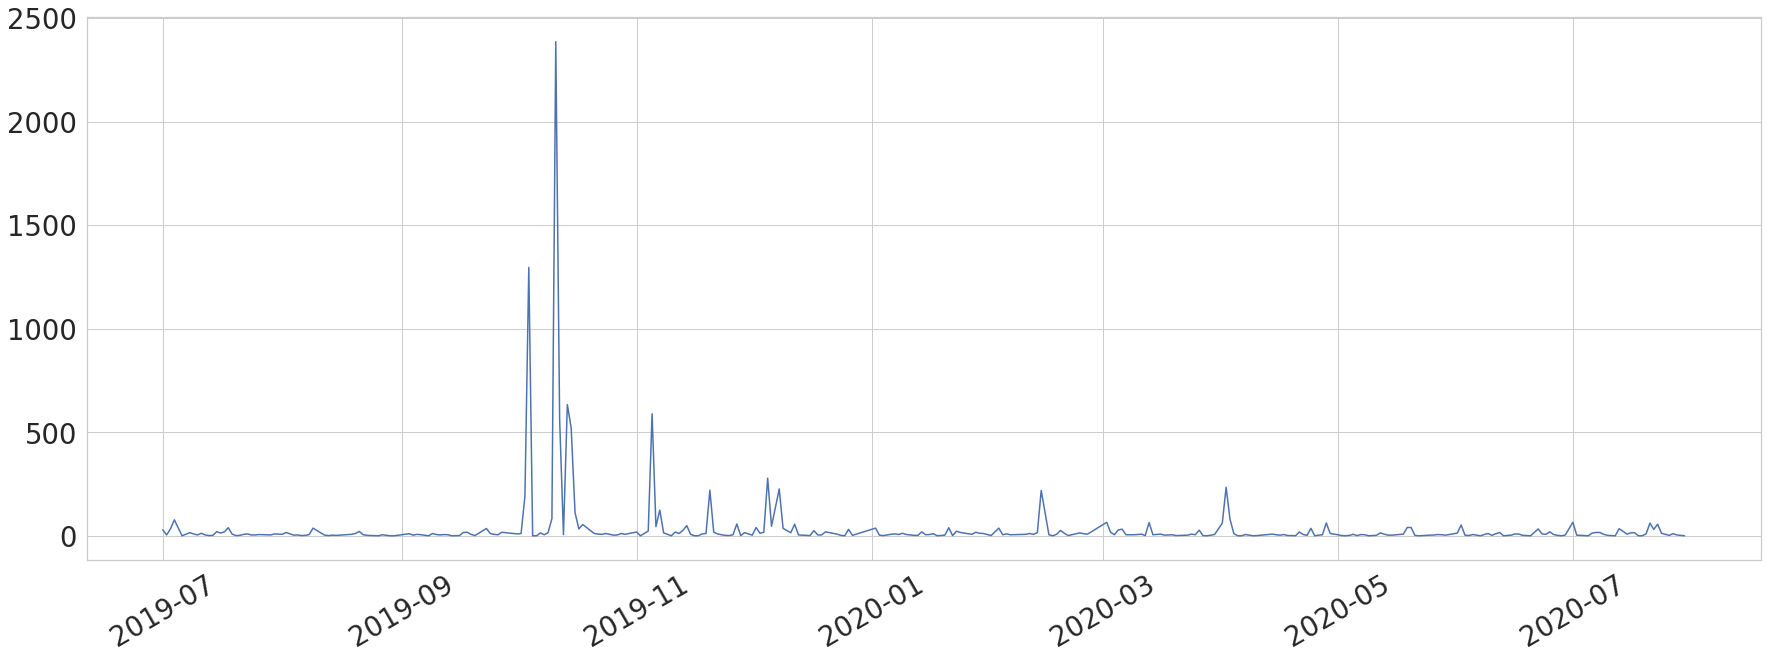

In [618]:
_ = data.date.value_counts().plot()
plt.xticks(rotation=30)

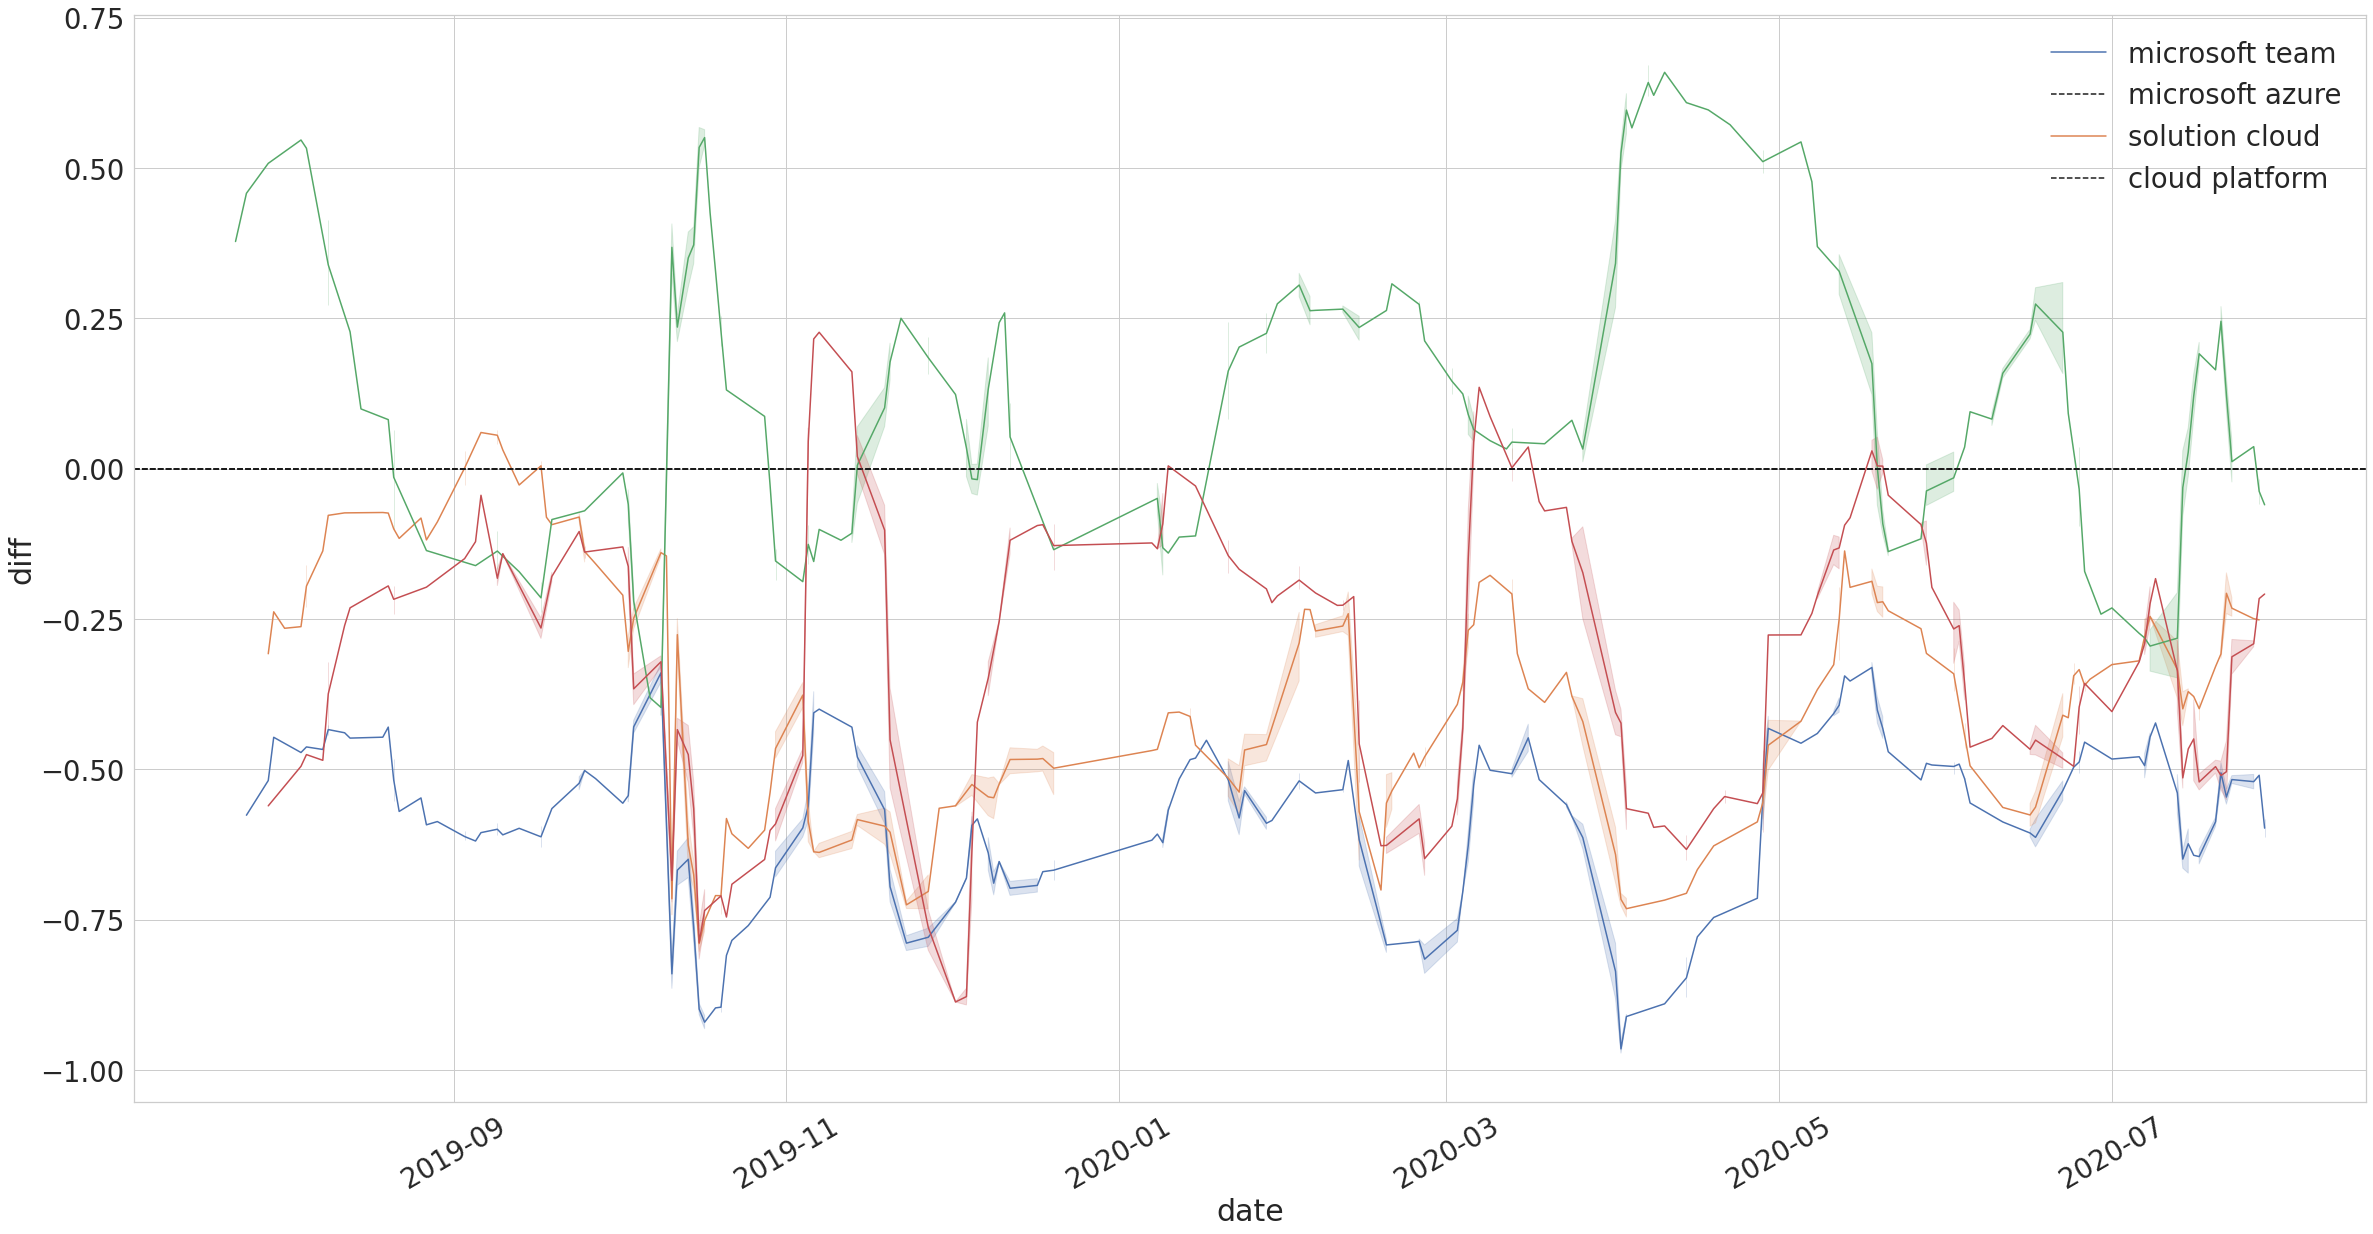

In [705]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

f, ax = plt.subplots(1, 1)
# Use white grid plot background from seaborn
sns.set(font_scale=2.5, style="whitegrid")
plt.rcParams["figure.figsize"] = (40,20)

#for pair in pairs[:10]:
#for pair in [x[0] for x in fd.most_common(30)]:
terms = ['microsoft team', 'microsoft azure', 'solution cloud', 'cloud platform']
#for pair in ['microsoft team', 'cloud platform']:, 'microsoft azure', 'azure security', 'solution cloud'
#terms = ['microsoft team']
for pair in terms:
#for pair in [x[0] for x in fd.most_common(10)]:
    x, y = [], []
    for index, pair_ in enumerate(pairs):
        if pair == pair_:
            #x.append(articles[index])
            x.append(pair_dates[index])
            y.append(diffs[index])
    normalized_y = np.array(y) / np.sqrt(np.sum(np.array(y)**2))

    df = pd.DataFrame(columns=['date', 'diff'])
    df['date'] = x
    df['diff'] = normalized_y

    #df['diff'] = df['diff'].rolling(24, win_type='triang').sum()
    df['diff'] = df['diff'].rolling(24, win_type='gaussian').sum(std=24)
    
    chart = sns.lineplot(ax=ax, data=df, x='date', y='diff')
    
    chart.axhline(0, color='k', linestyle='--')
    #plt.plot(x, normalized_y)
    #df.plot(x='date', y=pair)
    plt.xticks(rotation=30)
    #plt.title(' <-> '.join(pair.split(' ')))
    #plt.ylim((0, 1250))
    
ax.legend(loc='upper right', frameon=False, labels=terms)
plt.show()

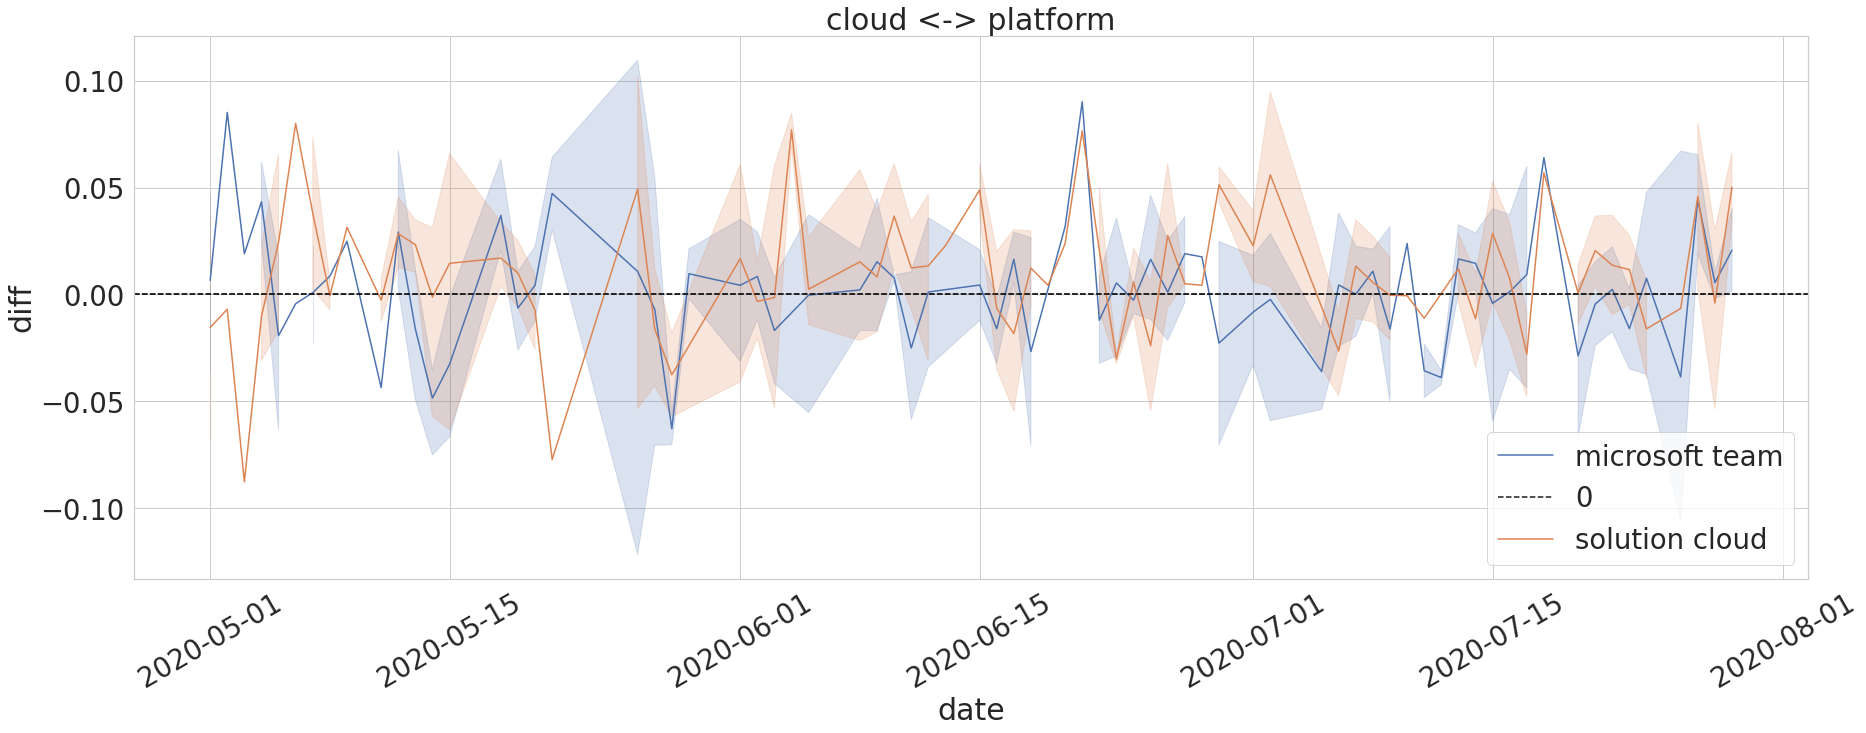

In [272]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

f, ax = plt.subplots(1, 1)
# Use white grid plot background from seaborn
sns.set(font_scale=2.5, style="whitegrid")
plt.rcParams["figure.figsize"] = (30,10)

#for pair in pairs[:10]:
#for pair in [x[0] for x in fd.most_common(30)]:
#for pair in ['microsoft team', 'microsoft azure', 'solution cloud', 'cloud platform']:
for pair in ['microsoft team', 'cloud platform']:
#for pair in [x[0] for x in fd.most_common(10)]:
    x, y = [], []
    for index, pair_ in enumerate(pairs):
        if pair == pair_:
            #x.append(articles[index])
            x.append(pair_dates[index])
            y.append(diffs[index])
    normalized_y = np.array(y) / np.sqrt(np.sum(np.array(y)**2))

    df = pd.DataFrame(columns=['date', 'diff'])
    df['date'] = x
    df['diff'] = normalized_y

    #df['diff'] = df['diff'].rolling(24, win_type='triang').sum()
    #df[pair] = df[pair].rolling(24, win_type='gaussian').sum(std=24)
    
    chart = sns.lineplot(ax=ax, data=df, x='date', y='diff')
    
    chart.axhline(0, color='k', linestyle='--')
    #plt.plot(x, normalized_y)
    #df.plot(x='date', y=pair)
    plt.xticks(rotation=30)
    plt.title(' <-> '.join(pair.split(' ')))
    #plt.ylim((0, 1250))
    
ax.legend(labels=['microsoft team', '0', 'solution cloud'])
plt.show()

In [252]:
import warnings
warnings.filterwarnings("ignore")

dates = [str(x) for x in dates]
dates[:3]

['2020-05-01', '2020-05-01', '2020-05-01']

In [253]:
from bertopic import BERTopic

from flair.embeddings import TransformerDocumentEmbeddings

roberta = TransformerDocumentEmbeddings('roberta-base')

#topic_model = BERTopic(embedding_model=roberta, verbose=True)
#topic_model = BERTopic(verbose=True)
topic_model = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2")

topics, probs = topic_model.fit_transform(corpus)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0.00/83.4M [00:00<?, ?B/s]

You try to use a model that was created with version 1.2.0, however, your version is 1.1.1. This might cause unexpected behavior or errors. In that case, try to update to the latest version.



2021-10-01 13:11:57,925 - BERTopic - Transformed documents to Embeddings
2021-10-01 13:12:01,026 - BERTopic - Reduced dimensionality with UMAP
2021-10-01 13:12:01,049 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [624]:
topics, probs = topic_model.fit_transform(corpus)

KeyboardInterrupt: 

In [254]:
topics_over_time = topic_model.topics_over_time(corpus, topics, dates, nr_bins=10)

In [255]:
topic_model.visualize_topics_over_time(topics_over_time)

In [251]:
topic_model.visualize_topics_over_time(topics_over_time)

In [146]:
test1 = "This is a test for a first sentence."
test2 = "This was his sentence in jail."

for test in [test1, test2]:
    doc = nlp(test)
    for token in doc:
        print(token, token.tensor)
    #similarity = nlp(keyword1).similarity(nlp(keyword2))

This [-0.38317496  1.3158145   1.9689201   0.28129953 -0.5322961   0.2583254
  0.6441725   1.0753366  -0.0689328  -0.4137593   2.600504    0.17771465
 -0.82661384 -0.8088553   0.9097433  -1.0194921  -0.7534461  -0.409149
 -0.25649798 -0.76790076  1.3132902   1.1523503  -1.4200162   0.663864
  0.53490037 -2.0582688  -0.26791823  0.26737323  0.39159542  0.19849432
  0.70082223  1.8434294  -0.9275761  -0.40395513  0.11941878  0.9857044
 -1.158906    1.415288   -0.17620954 -0.0661757   0.14397947 -1.0246772
 -0.6430144   0.97114885  0.7509868  -1.4151206   1.7232527   1.8673766
  0.93982613  0.01384604 -1.070117   -0.43124372  0.20664617  0.89850914
 -0.643664    1.8226202  -1.2546324  -1.2499046  -1.0792562  -0.74641347
  0.09782878  1.2228609   0.46179512  0.2781911   0.8879241  -0.5323155
 -0.04422249 -0.85224545  0.21616744  0.23248665 -0.69512486 -1.6578711
 -1.4454539  -0.2962888   0.7829091   1.6416684   0.15187427 -0.0660066
 -1.2272673  -1.3946048   0.16113597 -1.4205015   0.53818

In [118]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
import time

In [125]:
done = []
import time
from tqdm import tqdm
for _kw_list in tqdm(kw_permutations, total=len(kw_permutations)):
    _kw_list = [_kw_list[0], _kw_list[1]]
    if _kw_list not in done:
        
        pytrends.build_payload(_kw_list)
        df = pytrends.interest_over_time()

        df.to_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')

        done.append([_kw_list[0], _kw_list[1]])
        done.append([_kw_list[1], _kw_list[0]])

        time.sleep(2)


100%|██████████| 1560/1560 [33:47<00:00,  1.30s/it] 


In [133]:
_kw_list = ["microsoft", "azure"]
pytrends.build_payload(_kw_list)
df = pytrends.interest_over_time()

#df = pytrends.get_historical_interest(_kw_list, year_start=2019, month_start=12, day_start=1, hour_start=0, year_end=2020, month_end=12, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
df.to_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

df = pd.read_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')
keywords = list(df.columns[1:3])
df.plot(x="date", y=keywords)#, kind='bar', stacked=True)
plt.xticks(rotation=30)

plt.show()